**In this notebook we will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.**

#### Import numpy, matplotlib.pyplot and make it inline

In [66]:
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import csv

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [67]:
reg = np.loadtxt(open("RegData.csv", "rb"), delimiter=",", skiprows=1)
type(reg)
type(reg[1,1])

numpy.float64

#### Explore your data

In [72]:
reg

array([[6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [73]:
x = reg[:,0]
y = reg[:,1]

#### Explore your data

In [74]:
x

array([6.69999981, 4.9000001 , 7.9000001 , 9.80000019, 6.9000001 ,
       6.0999999 , 6.19999981, 6.        , 5.0999999 , 4.69999981,
       4.4000001 , 5.80000019])

In [75]:
y

array([7.4000001 , 5.        , 7.19999981, 7.9000001 , 6.0999999 ,
       6.        , 5.80000019, 5.19999981, 4.19999981, 4.        ,
       4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

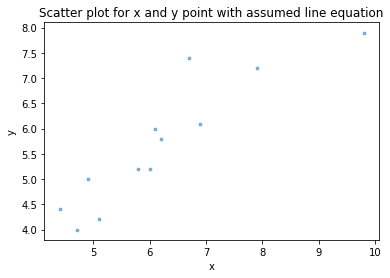

In [76]:
plt.scatter(x, y,s=8 ,alpha=0.5)
plt.title('Scatter plot for x and y point with assumed line equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

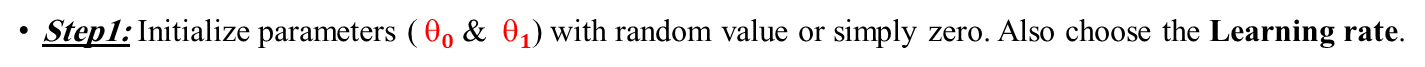

In [86]:
#We will intiate the function with assumed values for seta0 and seta1
# assume seta0 = 0 and  seta1 =0
seta0 = 0
seta1 = 0
alfa = .001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.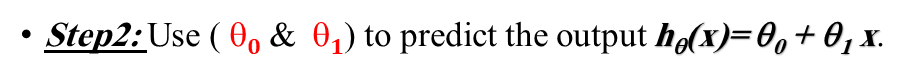
#### Note: you will need to iterate through all data points

In [87]:
y_prdict = seta0 + seta1*x

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).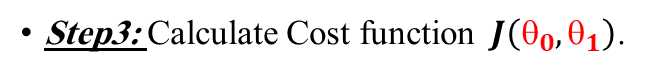
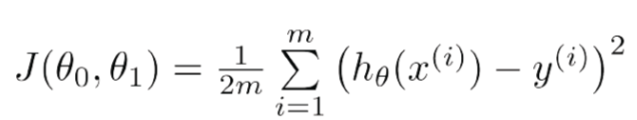

In [88]:
cost_fun = (1/2*y_prdict.size)*(sum(y_prdict - y))**2
print(cost_fun)

28071.359685633608


### Step4: Calculate the gradient.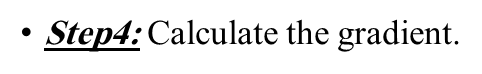
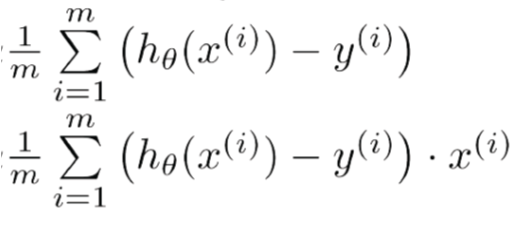

In [89]:
seta0  = 1/y_prdict.size*sum(y_prdict - y)
seta1 = (1/y_prdict.size)*sum((y_prdict - y)*x)
print("seta 0",seta0)
print("seta 1",seta1)

seta 0 -5.6999999680833335
seta 1 -36.99749984848332


### Step5: Update the parameters (simultaneously).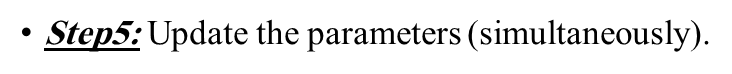
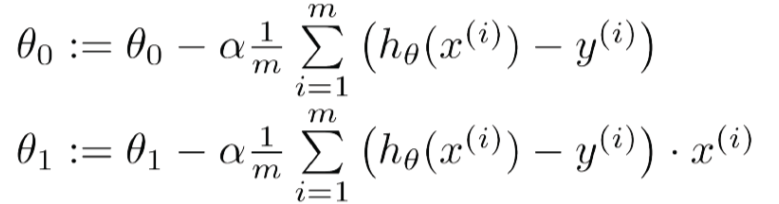

In [90]:
seta0 = seta0  - alfa*(1/y_prdict.size)*sum(y_prdict - y)
seta1 = seta1  - alfa*(1/y_prdict.size)*sum((y_prdict - y)*x)
print("seta 0",seta0)
print("seta 1",seta1)

seta 0 -5.69429996811525
seta 1 -36.96050234863484


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.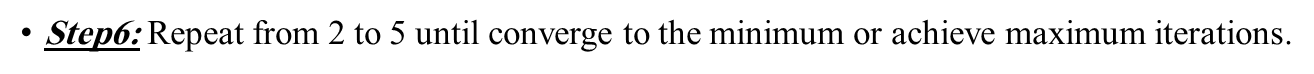

In [91]:
loss_diff_seta0 = 1
loss_diff_seta1 = 1
loss_norm = 10
j_list = []
while abs(loss_norm) > .00001: 
        y_prdict =np.array([(seta1*x) +seta0 for x in x])
        seta0 = seta0 - (alfa*(1/y.size)*sum((y_prdict - y)))
        seta1 = seta1 - (alfa*(1/y.size)*sum((y_prdict - y)*x))
        
        loss = alfa*(1/(2*y.size))*sum((y_prdict - y)**2)
        j_list.append(loss)
        loss_diff_seta0 = alfa*(1/y.size)*sum((y_prdict - y))
        loss_diff_seta1 = alfa*(1/y.size)*sum((y_prdict - y)*x)
        loss_norm = (loss_diff_seta0**2+loss_diff_seta1**2)**.5
        
        print("end iter",seta0,seta1)

end iter -5.453442549434357 -35.38598551458436
end iter -5.222601113516744 -33.87695630432409
end iter -5.001359075381955 -32.430690954535265
end iter -4.789317176665119 -31.044578988748622
end iter -4.58609276496781 -29.716118505514174
end iter -4.391319103182168 -28.44291166254561
end iter -4.204644707541635 -27.222660348688294
end iter -4.025732713203506 -26.05316203589889
end iter -3.8542602662181844 -24.932305803749607
end iter -3.689917940787682 -23.85806852928138
end iter -3.5324091807615106 -22.82851123532878
end iter -3.381449764361902 -21.841775590725536
end iter -3.2367672911721894 -20.896080556073603
end iter -3.098100690462385 -19.989719169021498
end iter -2.965199749964497 -19.121055463249473
end iter -2.8378246642470355 -18.288521515600323
end iter -2.715745601873544 -17.49061461602603
end iter -2.598742290563883 -16.72589455524208
end iter -2.4866036196095016 -15.992981025193753
end iter -2.3791272588250636 -15.290551127642283
end iter -2.2761192933486503 -14.6173369863

end iter 0.11396750047145514 0.8930626730177851
end iter 0.11400910217748936 0.8930563248205092
end iter 0.1140507016935423 0.8930499763525838
end iter 0.11409229902348422 0.8930436276386047
end iter 0.11413389417102882 0.8930372787021443
end iter 0.11417548713973973 0.893030929565794
end iter 0.11421707793303677 0.8930245802512046
end iter 0.11425866655420193 0.8930182307791258
end iter 0.11430025300638508 0.8930118811694439
end iter 0.11434183729260948 0.893005531441217
end iter 0.11438341941577707 0.8929991816127102
end iter 0.11442499937867347 0.8929928317014281
end iter 0.11446657718397284 0.8929864817241464
end iter 0.11450815283424254 0.8929801316969428
end iter 0.11454972633194753 0.8929737816352252
end iter 0.11459129767945464 0.8929674315537603
end iter 0.11463286687903668 0.8929610814666998
end iter 0.1146744339328763 0.8929547313876062
end iter 0.11471599884306978 0.8929483813294771
end iter 0.11475756161163062 0.8929420313047689
end iter 0.11479912224049296 0.8929356813254

end iter 0.13645230052913962 0.889624093607692
end iter 0.13649276528228685 0.8896179047408846
end iter 0.13653322799322903 0.8896117161864217
end iter 0.13657368866206923 0.8896055279442872
end iter 0.13661414728891053 0.8895993400144654
end iter 0.13665460387385595 0.8895931523969407
end iter 0.13669505841700855 0.8895869650916972
end iter 0.1367355109184714 0.8895807780987193
end iter 0.1367759613783475 0.889574591417991
end iter 0.13681640979673992 0.8895684050494967
end iter 0.13685685617375168 0.8895622189932207
end iter 0.13689730050948581 0.8895560332491471
end iter 0.13693774280404533 0.8895498478172602
end iter 0.13697818305753326 0.8895436626975443
end iter 0.1370186212700526 0.8895374778899835
end iter 0.13705905744170635 0.8895312933945622
end iter 0.13709949157259754 0.8895251092112645
end iter 0.13713992366282915 0.8895189253400748
end iter 0.13718035371250414 0.8895127417809773
end iter 0.13722078172172553 0.8895065585339562
end iter 0.13726120769059627 0.88950037559899

end iter 0.15255562961702113 0.8871611758551231
end iter 0.15259528165546082 0.8871551112886682
end iter 0.15263493169271214 0.8871490470282843
end iter 0.1526745797288761 0.887142983073956
end iter 0.1527142257640537 0.8871369194256679
end iter 0.15275386979834588 0.8871308560834044
end iter 0.15279351183185366 0.8871247930471501
end iter 0.15283315186467802 0.8871187303168896
end iter 0.1528727898969199 0.8871126678926075
end iter 0.15291242592868032 0.8871066057742882
end iter 0.1529520599600602 0.8871005439619165
end iter 0.1529916919911605 0.8870944824554767
end iter 0.15303132202208217 0.8870884212549536
end iter 0.15307095005292617 0.8870823603603316
end iter 0.15311057608379344 0.8870762997715953
end iter 0.15315020011478492 0.8870702394887293
end iter 0.15318982214600152 0.8870641795117181
end iter 0.1532294421775442 0.8870581198405463
end iter 0.15326906020951384 0.8870520604751985
end iter 0.1533086762420114 0.8870460014156591
end iter 0.15334829027513774 0.8870399426619129


end iter 0.1713603903392657 0.8842850886334768
end iter 0.17139909332515063 0.8842791692195162
end iter 0.17143779435774467 0.884273250104301
end iter 0.1714764934371464 0.8842673312878161
end iter 0.17151519056345443 0.8842614127700464
end iter 0.1715538857367673 0.8842554945509769
end iter 0.17159257895718358 0.8842495766305923
end iter 0.17163127022480182 0.8842436590088778
end iter 0.17166995953972058 0.8842377416858181
end iter 0.17170864690203844 0.8842318246613984
end iter 0.1717473323118539 0.8842259079356034
end iter 0.17178601576926553 0.8842199915084181
end iter 0.17182469727437186 0.8842140753798274
end iter 0.1718633768272714 0.8842081595498162
end iter 0.1719020544280627 0.8842022440183696
end iter 0.17194073007684427 0.8841963287854723
end iter 0.17197940377371462 0.8841904138511093
end iter 0.1720180755187723 0.8841844992152657
end iter 0.17205674531211576 0.8841785848779262
end iter 0.17209541315384352 0.8841726708390759
end iter 0.1721340790440541 0.8841667570986997
e

end iter 0.18808886728118737 0.8817265578719894
end iter 0.18812672600194105 0.8817207675838493
end iter 0.18816458281201287 0.8817149775879377
end iter 0.18820243771149922 0.8817091878842399
end iter 0.18824029070049655 0.8817033984727412
end iter 0.18827814177910127 0.8816976093534267
end iter 0.18831599094740978 0.8816918205262818
end iter 0.18835383820551851 0.8816860319912917
end iter 0.18839168355352387 0.8816802437484417
end iter 0.18842952699152224 0.881674455797717
end iter 0.18846736851961002 0.8816686681391028
end iter 0.18850520813788363 0.8816628807725845
end iter 0.1885430458464394 0.8816570936981473
end iter 0.1885808816453738 0.8816513069157764
end iter 0.1886187155347831 0.8816455204254572
end iter 0.18865654751476374 0.8816397342271748
end iter 0.18869437758541208 0.8816339483209146
end iter 0.18873220574682445 0.8816281627066617
end iter 0.18877003199909723 0.8816223773844014
end iter 0.18880785634232677 0.8816165923541192
end iter 0.18884567877660943 0.8816108076158

end iter 0.2063387254830065 0.8789353400125126
end iter 0.2063756631564357 0.8789296905936173
end iter 0.20641259896566716 0.8789240414598409
end iter 0.2064495329107949 0.8789183926111692
end iter 0.206486464991913 0.8789127440475878
end iter 0.20652339520911556 0.8789070957690823
end iter 0.20656032356249662 0.8789014477756383
end iter 0.2065972500521503 0.8788958000672413
end iter 0.2066341746781706 0.8788901526438772
end iter 0.2066710974406516 0.8788845055055313
end iter 0.20670801833968735 0.8788788586521894
end iter 0.2067449373753719 0.8788732120838371
end iter 0.20678185454779927 0.8788675658004599
end iter 0.20681876985706352 0.8788619198020435
end iter 0.20685568330325868 0.8788562740885736
end iter 0.20689259488647876 0.8788506286600357
end iter 0.2069295046068178 0.8788449835164155
end iter 0.2069664124643698 0.8788393386576985
end iter 0.20700331845922879 0.8788336940838704
end iter 0.20704022259148877 0.8788280497949168
end iter 0.20707712486124374 0.8788224057908234
end

end iter 0.22428873653969966 0.8761899821645132
end iter 0.22432476829871162 0.8761844713003656
end iter 0.22436079823924615 0.8761789607143444
end iter 0.22439682636139502 0.8761734504064356
end iter 0.22443285266525 0.8761679403766249
end iter 0.22446887715090288 0.8761624306248986
end iter 0.2245048998184454 0.8761569211512426
end iter 0.22454092066796935 0.8761514119556426
end iter 0.22457693969956644 0.8761459030380848
end iter 0.22461295691332844 0.8761403943985552
end iter 0.2246489723093471 0.8761348860370396
end iter 0.22468498588771416 0.8761293779535241
end iter 0.22472099764852133 0.8761238701479946
end iter 0.22475700759186035 0.8761183626204372
end iter 0.22479301571782295 0.8761128553708377
end iter 0.22482902202650085 0.8761073483991821
end iter 0.22486502651798576 0.8761018417054565
end iter 0.2249010291923694 0.8760963352896467
end iter 0.22493703004974347 0.8760908291517387
end iter 0.2249730290901997 0.8760853232917186
end iter 0.22500902631382974 0.8760798177095723

end iter 0.2398626370031087 0.873808037678454
end iter 0.239897882767008 0.8738026470280403
end iter 0.23993312675209805 0.8737972566496859
end iter 0.23996836895846863 0.873791866543377
end iter 0.24000360938620952 0.8737864767091
end iter 0.24003884803541045 0.8737810871468412
end iter 0.24007408490616122 0.8737756978565868
end iter 0.24010931999855156 0.8737703088383231
end iter 0.24014455331267123 0.8737649200920363
end iter 0.24017978484861 0.8737595316177128
end iter 0.24021501460645756 0.8737541434153387
end iter 0.24025024258630368 0.8737487554849005
end iter 0.2402854687882381 0.8737433678263843
end iter 0.24032069321235053 0.8737379804397764
end iter 0.2403559158587307 0.873732593325063
end iter 0.24039113672746834 0.8737272064822307
end iter 0.24042635581865318 0.8737218199112654
end iter 0.2404615731323749 0.8737164336121536
end iter 0.2404967886687232 0.8737110475848815
end iter 0.24053200242778783 0.8737056618294354
end iter 0.24056721440965845 0.8737002763458016
end iter

end iter 0.2571623471857146 0.8711621398587855
end iter 0.25719671985506154 0.8711568827434975
end iter 0.2572310907896632 0.8711516258935292
end iter 0.25726545998960715 0.8711463693088677
end iter 0.2572998274549809 0.8711411129894993
end iter 0.2573341931858721 0.8711358569354107
end iter 0.2573685571823681 0.8711306011465886
end iter 0.2574029194445566 0.8711253456230195
end iter 0.2574372799725251 0.87112009036469
end iter 0.25747163876636103 0.8711148353715867
end iter 0.257505995826152 0.8711095806436964
end iter 0.25754035115198554 0.8711043261810055
end iter 0.25757470474394906 0.8710990719835008
end iter 0.2576090566021301 0.8710938180511688
end iter 0.25764340672661623 0.8710885643839962
end iter 0.2576777551174949 0.8710833109819694
end iter 0.2577121017748536 0.8710780578450753
end iter 0.25774644669877983 0.8710728049733003
end iter 0.25778078988936104 0.8710675523666311
end iter 0.25781513134668477 0.8710623000250545
end iter 0.25784947107083844 0.8710570479485568
end it

end iter 0.2721200077437985 0.8688744459587007
end iter 0.2721536255188835 0.8688693043004382
end iter 0.2721872415973218 0.8688641629016687
end iter 0.27222085597919904 0.8688590217623791
end iter 0.2722544686646008 0.8688538808825562
end iter 0.27228807965361274 0.8688487402621872
end iter 0.2723216889463205 0.8688435999012587
end iter 0.2723552965428096 0.8688384597997578
end iter 0.2723889024431657 0.8688333199576713
end iter 0.2724225066474744 0.8688281803749862
end iter 0.2724561091558213 0.8688230410516894
end iter 0.27248970996829197 0.8688179019877676
end iter 0.272523309084972 0.868812763183208
end iter 0.27255690650594705 0.8688076246379973
end iter 0.2725905022313026 0.8688024863521225
end iter 0.27262409626112427 0.8687973483255707
end iter 0.2726576885954976 0.8687922105583284
end iter 0.2726912792345082 0.8687870730503828
end iter 0.27272486817824165 0.8687819358017208
end iter 0.27275845542678345 0.8687767988123293
end iter 0.2727920409802192 0.868771662082195
end iter 

end iter 0.2874392877192719 0.8665314443096466
end iter 0.2874721323496191 0.866526420899722
end iter 0.28750497532233926 0.8665213977433226
end iter 0.287537816637516 0.8665163748404355
end iter 0.287570656295233 0.866511352191048
end iter 0.28760349429557386 0.8665063297951473
end iter 0.28763633063862226 0.8665013076527206
end iter 0.28766916532446185 0.866496285763755
end iter 0.2877019983531763 0.866491264128238
end iter 0.28773482972484915 0.8664862427461565
end iter 0.2877676594395641 0.8664812216174979
end iter 0.2878004874974048 0.8664762007422492
end iter 0.2878333138984548 0.8664711801203978
end iter 0.28786613864279775 0.8664661597519309
end iter 0.28789896173051727 0.8664611396368356
end iter 0.28793178316169693 0.8664561197750992
end iter 0.28796460293642034 0.8664511001667089
end iter 0.28799742105477116 0.8664460808116519
end iter 0.28803023751683293 0.8664410617099154
end iter 0.28806305232268925 0.8664360428614867
end iter 0.2880958654724237 0.8664310242663529
end ite

end iter 0.3029194874287112 0.864163830850987
end iter 0.30295155079290464 0.8641589269315274
end iter 0.3029836125389005 0.8641540232595624
end iter 0.3030156726667805 0.8641491198350795
end iter 0.30304773117662626 0.8641442166580663
end iter 0.3030797880685195 0.8641393137285103
end iter 0.3031118433425418 0.8641344110463989
end iter 0.3031438969987749 0.8641295086117197
end iter 0.3031759490373004 0.8641246064244602
end iter 0.30320799945819993 0.864119704484608
end iter 0.30324004826155515 0.8641148027921504
end iter 0.30327209544744765 0.864109901347075
end iter 0.30330414101595915 0.8641050001493694
end iter 0.3033361849671712 0.8641000991990211
end iter 0.3033682273011654 0.8640951984960176
end iter 0.3034002680180235 0.8640902980403463
end iter 0.303432307117827 0.8640853978319949
end iter 0.3034643446006575 0.8640804978709508
end iter 0.3034963804665967 0.8640755981572015
end iter 0.30352841471572617 0.8640706986907346
end iter 0.3035604473481275 0.8640657994715376
end iter 0

end iter 0.31774968666554504 0.8618956314758642
end iter 0.31778100156828865 0.8618908420295661
end iter 0.3178123148906086 0.8618860528249853
end iter 0.31784362663258475 0.8618812638621096
end iter 0.31787493679429674 0.8618764751409268
end iter 0.31790624537582435 0.8618716866614248
end iter 0.31793755237724736 0.8618668984235912
end iter 0.3179688577986455 0.861862110427414
end iter 0.3180001616400985 0.861857322672881
end iter 0.3180314639016861 0.8618525351599798
end iter 0.318062764583488 0.8618477478886984
end iter 0.31809406368558396 0.8618429608590246
end iter 0.31812536120805374 0.8618381740709461
end iter 0.318156657150977 0.8618333875244507
end iter 0.3181879515144336 0.8618286012195263
end iter 0.31821924429850307 0.8618238151561607
end iter 0.3182505355032652 0.8618190293343416
end iter 0.3182818251287997 0.861814243754057
end iter 0.3183131131751863 0.8618094584152945
end iter 0.31834439964250466 0.8618046733180421
end iter 0.3183756845308345 0.8617998884622875
end iter

end iter 0.33088648018780975 0.8598864294157659
end iter 0.33091713209315404 0.8598817413713615
end iter 0.33094778245153533 0.8598770535635568
end iter 0.3309784312630317 0.8598723659923398
end iter 0.3310090785277212 0.8598676786576986
end iter 0.33103972424568195 0.8598629915596213
end iter 0.33107036841699194 0.859858304698096
end iter 0.3311010110417293 0.8598536180731107
end iter 0.331131652119972 0.8598489316846534
end iter 0.3311622916517981 0.8598442455327122
end iter 0.3311929296372857 0.8598395596172752
end iter 0.3312235660765128 0.8598348739383305
end iter 0.3312542009695575 0.859830188495866
end iter 0.33128483431649774 0.8598255032898698
end iter 0.33131546611741164 0.8598208183203302
end iter 0.33134609637237716 0.8598161335872351
end iter 0.33137672508147237 0.8598114490905725
end iter 0.33140735224477524 0.8598067648303306
end iter 0.33143797786236384 0.8598020808064973
end iter 0.3314686019343161 0.8597973970190609
end iter 0.3314992244607101 0.8597927134680092
end i

end iter 0.34605094400049174 0.8575671060678656
end iter 0.3460808305744747 0.8575625350767851
end iter 0.34611071564011997 0.8575579643163969
end iter 0.3461405991975037 0.857553393786689
end iter 0.3461704812467019 0.8575488234876502
end iter 0.34620036178779084 0.8575442534192684
end iter 0.3462302408208466 0.8575396835815323
end iter 0.34626011834594517 0.8575351139744302
end iter 0.34628999436316277 0.8575305445979503
end iter 0.34631986887257543 0.8575259754520811
end iter 0.3463497418742593 0.857521406536811
end iter 0.3463796133682905 0.8575168378521282
end iter 0.34640948335474503 0.8575122693980212
end iter 0.346439351833699 0.8575077011744783
end iter 0.3464692188052285 0.8575031331814879
end iter 0.3464990842694097 0.8574985654190383
end iter 0.3465289482263185 0.857493997887118
end iter 0.3465588106760311 0.8574894305857153
end iter 0.34658867161862356 0.8574848635148185
end iter 0.3466185310541719 0.8574802966744159
end iter 0.3466483889827522 0.8574757300644961
end iter 

end iter 0.35990350604457627 0.8554484310541001
end iter 0.35993269349722545 0.8554439669898752
end iter 0.3599618794768207 0.8554395031509461
end iter 0.35999106398343633 0.8554350395373013
end iter 0.36002024701714674 0.8554305761489294
end iter 0.3600494285780263 0.855426112985819
end iter 0.36007860866614927 0.855421650047959
end iter 0.36010778728159 0.8554171873353378
end iter 0.3601369644244228 0.8554127248479441
end iter 0.360166140094722 0.8554082625857664
end iter 0.3601953142925619 0.8554038005487935
end iter 0.36022448701801685 0.855399338737014
end iter 0.3602536582711611 0.8553948771504165
end iter 0.36028282805206907 0.8553904157889897
end iter 0.36031199636081496 0.855385954652722
end iter 0.3603411631974731 0.8553814937416024
end iter 0.3603703285621178 0.8553770330556193
end iter 0.36039949245482333 0.8553725725947614
end iter 0.360428654875664 0.8553681123590173
end iter 0.36045781582471403 0.8553636523483757
end iter 0.36048697530204776 0.8553591925628252
end iter 0

end iter 0.37289015973809186 0.8534621920749628
end iter 0.3729186917707095 0.853457828253714
end iter 0.3729472223633515 0.8534534646527017
end iter 0.3729757515160904 0.8534491012719149
end iter 0.373004279228999 0.8534447381113424
end iter 0.37303280550214984 0.853440375170973
end iter 0.37306133033561567 0.8534360124507958
end iter 0.3730898537294691 0.8534316499507996
end iter 0.37311837568378287 0.8534272876709732
end iter 0.37314689619862956 0.8534229256113056
end iter 0.3731754152740819 0.8534185637717857
end iter 0.3732039329102124 0.8534142021524023
end iter 0.37323244910709386 0.8534098407531443
end iter 0.3732609638647988 0.8534054795740006
end iter 0.37328947718339983 0.8534011186149602
end iter 0.37331798906296965 0.8533967578760118
end iter 0.3733464995035809 0.8533923973571444
end iter 0.37337500850530614 0.853388037058347
end iter 0.37340351606821803 0.8533836769796083
end iter 0.3734320221923892 0.8533793171209173
end iter 0.3734605268778922 0.8533749574822629
end ite

end iter 0.3842167900715384 0.8517298447589026
end iter 0.38424475046340967 0.8517255683670377
end iter 0.3842727094441552 0.851721292190997
end iter 0.38430066701384624 0.8517170162307695
end iter 0.384328623172554 0.8517127404863443
end iter 0.3843565779203497 0.8517084649577105
end iter 0.38438453125730454 0.8517041896448572
end iter 0.38441248318348975 0.8516999145477736
end iter 0.38444043369897646 0.8516956396664488
end iter 0.38446838280383594 0.8516913650008718
end iter 0.3844963304981393 0.8516870905510319
end iter 0.38452427678195783 0.851682816316918
end iter 0.3845522216553626 0.8516785422985192
end iter 0.3845801651184249 0.8516742684958248
end iter 0.38460810717121585 0.8516699949088239
end iter 0.38463604781380667 0.8516657215375055
end iter 0.3846639870462685 0.8516614483818588
end iter 0.3846919248686725 0.8516571754418728
end iter 0.3847198612810898 0.8516529027175367
end iter 0.3847477962835917 0.8516486302088396
end iter 0.3847757298762492 0.8516443579157706
end ite

end iter 0.39665747582549804 0.8498271086457456
end iter 0.39668480835165104 0.8498229282825724
end iter 0.3967121394983659 0.8498187481303769
end iter 0.3967394692657123 0.8498145681891485
end iter 0.3967667976537598 0.8498103884588764
end iter 0.39679412466257796 0.84980620893955
end iter 0.3968214502922365 0.8498020296311586
end iter 0.3968487745428049 0.8497978505336916
end iter 0.3968760974143529 0.8497936716471385
end iter 0.3969034189069501 0.8497894929714884
end iter 0.39693073902066595 0.8497853145067309
end iter 0.39695805775557014 0.8497811362528552
end iter 0.39698537511173226 0.8497769582098508
end iter 0.3970126910892219 0.8497727803777069
end iter 0.39704000568810854 0.8497686027564129
end iter 0.39706731890846186 0.8497644253459581
end iter 0.3970946307503514 0.849760248146332
end iter 0.3971219412138467 0.8497560711575238
end iter 0.3971492502990174 0.849751894379523
end iter 0.397176558005933 0.849747717812319
end iter 0.39720386433466304 0.849743541455901
end iter 0.

end iter 0.4081771443102939 0.8480652371805304
end iter 0.4082038954533085 0.8480611457367878
end iter 0.4082306452462266 0.8480570544995352
end iter 0.40825739368911645 0.8480529634687621
end iter 0.4082841407820461 0.8480488726444583
end iter 0.40831088652508374 0.8480447820266132
end iter 0.40833763091829745 0.8480406916152163
end iter 0.40836437396175534 0.8480366014102574
end iter 0.4083911156555256 0.848032511411726
end iter 0.4084178559996763 0.8480284216196117
end iter 0.40844459499427554 0.8480243320339039
end iter 0.40847133263939145 0.8480202426545924
end iter 0.4084980689350921 0.8480161534816668
end iter 0.4085248038814457 0.8480120645151166
end iter 0.40855153747852024 0.8480079757549313
end iter 0.40857826972638384 0.8480038872011005
end iter 0.40860500062510463 0.847999798853614
end iter 0.4086317301747507 0.8479957107124612
end iter 0.40865845837539005 0.8479916227776316
end iter 0.40868518522709085 0.8479875350491151
end iter 0.4087119107299212 0.847983447526901
end i

end iter 0.42102037190714825 0.8461009344530663
end iter 0.4210464748686655 0.8460969421452047
end iter 0.42107257651279917 0.8460929500388299
end iter 0.4210986768396158 0.8460889581339316
end iter 0.4211247758491819 0.8460849664304997
end iter 0.4211508735415639 0.8460809749285241
end iter 0.42117696991682824 0.8460769836279945
end iter 0.42120306497504145 0.8460729925289009
end iter 0.42122915871627 0.846069001631233
end iter 0.4212552511405803 0.8460650109349807
end iter 0.4212813422480389 0.8460610204401338
end iter 0.42130743203871224 0.8460570301466821
end iter 0.4213335205126667 0.8460530400546155
end iter 0.4213596076699688 0.8460490501639237
end iter 0.421385693510685 0.8460450604745968
end iter 0.4214117780348817 0.8460410709866244
end iter 0.4214378612426254 0.8460370816999965
end iter 0.42146394313398244 0.8460330926147028
end iter 0.42149002370901933 0.8460291037307333
end iter 0.4215161029678025 0.8460251150480776
end iter 0.4215421809103984 0.8460211265667258
end iter 0

end iter 0.4317151501119988 0.844465225528734
end iter 0.4317407133215496 0.8444613157730387
end iter 0.4317662752409575 0.8444574062146638
end iter 0.4317918358702876 0.8444534968535994
end iter 0.4318173952096049 0.8444495876898355
end iter 0.4318429532589746 0.8444456787233621
end iter 0.43186851001846177 0.8444417699541693
end iter 0.43189406548813153 0.8444378613822472
end iter 0.431919619668049 0.8444339530075858
end iter 0.4319451725582792 0.8444300448301751
end iter 0.43197072415888726 0.8444261368500052
end iter 0.4319962744699383 0.8444222290670662
end iter 0.43202182349149737 0.8444183214813481
end iter 0.4320473712236295 0.8444144140928409
end iter 0.4320729176663999 0.8444105069015346
end iter 0.43209846281987346 0.8444065999074194
end iter 0.4321240066841154 0.8444026931104852
end iter 0.4321495492591907 0.8443987865107222
end iter 0.43217509054516445 0.8443948801081202
end iter 0.4322006305421017 0.8443909739026696
end iter 0.43222616925006757 0.8443870678943601
end iter

end iter 0.44416263093043334 0.842561450146937
end iter 0.4441875659313276 0.8425576364723838
end iter 0.44421249967378373 0.842553822990302
end iter 0.4442374321578654 0.842550009700682
end iter 0.444262363383636 0.8425461966035137
end iter 0.4442872933511591 0.8425423836987878
end iter 0.44431222206049814 0.8425385709864942
end iter 0.4443371495117167 0.8425347584666235
end iter 0.44436207570487823 0.8425309461391659
end iter 0.44438700064004627 0.8425271340041116
end iter 0.44441192431728427 0.842523322061451
end iter 0.4444368467366557 0.8425195103111742
end iter 0.444461767898224 0.8425156987532717
end iter 0.44448668780205275 0.8425118873877337
end iter 0.44451160644820537 0.8425080762145506
end iter 0.44453652383674536 0.8425042652337126
end iter 0.44456143996773617 0.8425004544452099
end iter 0.4445863548412413 0.842496643849033
end iter 0.4446112684573242 0.842492833445172
end iter 0.4446361808160483 0.8424890232336173
end iter 0.44466109191747705 0.8424852132143592
end iter 0

end iter 0.45696048796457894 0.8406040866035219
end iter 0.4569847770737709 0.840600371714638
end iter 0.4570090649571221 0.8405966570132398
end iter 0.4570333516146945 0.8405929424993179
end iter 0.4570576370465499 0.8405892281728629
end iter 0.4570819212527502 0.8405855140338652
end iter 0.45710620423335724 0.8405818000823154
end iter 0.45713048598843287 0.8405780863182041
end iter 0.457154766518039 0.8405743727415218
end iter 0.4571790458222374 0.840570659352259
end iter 0.4572033239010899 0.8405669461504063
end iter 0.45722760075465846 0.8405632331359542
end iter 0.4572518763830048 0.8405595203088932
end iter 0.45727615078619077 0.840555807669214
end iter 0.4573004239642783 0.840552095216907
end iter 0.4573246959173291 0.8405483829519628
end iter 0.45734896664540503 0.8405446708743719
end iter 0.45737323614856795 0.8405409589841248
end iter 0.45739750442687965 0.8405372472812123
end iter 0.457421771480402 0.8405335357656246
end iter 0.4574460373091967 0.8405298244373525
end iter 0.

end iter 0.467696436405404 0.8389620809125701
end iter 0.4677201836848196 0.8389584488936422
end iter 0.46774392976574 0.8389548170580179
end iter 0.4677676746482256 0.8389511854056877
end iter 0.467791418332337 0.8389475539366423
end iter 0.46781516081813457 0.8389439226508727
end iter 0.46783890210567886 0.8389402915483695
end iter 0.4678626421950303 0.8389366606291234
end iter 0.4678863810862494 0.8389330298931252
end iter 0.4679101187793966 0.8389293993403657
end iter 0.46793385527453235 0.8389257689708356
end iter 0.46795759057171715 0.8389221387845257
end iter 0.4679813246710114 0.8389185087814267
end iter 0.4680050575724756 0.8389148789615294
end iter 0.46802878927617025 0.8389112493248245
end iter 0.46805251978215573 0.8389076198713028
end iter 0.4680762490904925 0.838903990600955
end iter 0.46809997720124097 0.8389003615137719
end iter 0.46812370411446164 0.8388967326097443
end iter 0.4681474298302149 0.8388931038888628
end iter 0.4681711543485612 0.8388894753511185
end iter 0

end iter 0.47770505341917036 0.8374313166595798
end iter 0.4777282955763094 0.837427761896393
end iter 0.4777515365604461 0.8374242073126107
end iter 0.4777747763716397 0.8374206529082238
end iter 0.4777980150099493 0.8374170986832231
end iter 0.4778212524754341 0.8374135446375996
end iter 0.4778444887681534 0.8374099907713445
end iter 0.47786772388816623 0.8374064370844484
end iter 0.47789095783553187 0.8374028835769024
end iter 0.47791419061030954 0.8373993302486975
end iter 0.47793742221255836 0.8373957770998246
end iter 0.4779606526423375 0.8373922241302746
end iter 0.47798388189970614 0.8373886713400385
end iter 0.47800710998472346 0.8373851187291071
end iter 0.4780303368974486 0.8373815662974716
end iter 0.4780535626379408 0.8373780140451229
end iter 0.4780767872062592 0.8373744619720519
end iter 0.4781000106024629 0.8373709100782495
end iter 0.47812323282661107 0.8373673583637067
end iter 0.47814645387876287 0.8373638068284145
end iter 0.47816967375897745 0.8373602554723638
end 

end iter 0.4895661333784718 0.835617228141797
end iter 0.489588776921866 0.8356137649333696
end iter 0.4896114193224691 0.835610301899726
end iter 0.4896340605803388 0.8356068390408572
end iter 0.4896567006955328 0.8356033763567546
end iter 0.4896793396681087 0.8355999138474094
end iter 0.4897019774981243 0.8355964515128126
end iter 0.48972461418563706 0.8355929893529555
end iter 0.48974724973070477 0.8355895273678291
end iter 0.48976988413338507 0.8355860655574248
end iter 0.48979251739373564 0.8355826039217337
end iter 0.4898151495118141 0.8355791424607469
end iter 0.4898377804876781 0.8355756811744558
end iter 0.48986041032138533 0.8355722200628515
end iter 0.48988303901299335 0.835568759125925
end iter 0.48990566656255985 0.8355652983636677
end iter 0.4899282929701425 0.8355618377760706
end iter 0.4899509182357989 0.8355583773631251
end iter 0.4899735423595867 0.8355549171248222
end iter 0.4899961653415634 0.8355514570611532
end iter 0.4900187871817868 0.8355479971721093
end iter 0

end iter 0.5020252869884241 0.8337116674691889
end iter 0.5020473017340505 0.8337083004320051
end iter 0.5020693153686207 0.8337049335647514
end iter 0.5020913278921904 0.8337015668674193
end iter 0.5021133393048157 0.8336982003400001
end iter 0.5021353496065529 0.8336948339824853
end iter 0.5021573587974579 0.8336914677948664
end iter 0.5021793668775868 0.8336881017771347
end iter 0.5022013738469956 0.8336847359292817
end iter 0.5022233797057405 0.8336813702512987
end iter 0.5022453844538775 0.8336780047431773
end iter 0.5022673880914625 0.8336746394049088
end iter 0.5022893906185517 0.8336712742364847
end iter 0.5023113920352011 0.8336679092378964
end iter 0.5023333923414668 0.8336645444091353
end iter 0.5023553915374047 0.8336611797501929
end iter 0.502377389623071 0.8336578152610606
end iter 0.5023993865985217 0.8336544509417299
end iter 0.5024213824638127 0.833651086792192
end iter 0.5024433772190002 0.8336477228124386
end iter 0.5024653708641401 0.8336443590024609
end iter 0.5024

end iter 0.5102681931285259 0.832450959217223
end iter 0.5102897918650765 0.8324476558063946
end iter 0.5103113895115661 0.8324443525622851
end iter 0.5103329860680497 0.8324410494848862
end iter 0.5103545815345824 0.8324377465741893
end iter 0.5103761759112191 0.8324344438301863
end iter 0.5103977691980148 0.8324311412528685
end iter 0.5104193613950246 0.8324278388422277
end iter 0.5104409525023035 0.8324245365982554
end iter 0.5104625425199064 0.8324212345209432
end iter 0.5104841314478884 0.8324179326102826
end iter 0.5105057192863044 0.8324146308662653
end iter 0.5105273060352093 0.8324113292888828
end iter 0.5105488916946583 0.8324080278781268
end iter 0.5105704762647063 0.8324047266339889
end iter 0.5105920597454083 0.8324014255564606
end iter 0.5106136421368193 0.8323981246455334
end iter 0.5106352234389941 0.8323948239011991
end iter 0.510656803651988 0.8323915233234492
end iter 0.5106783827758555 0.8323882229122753
end iter 0.510699960810652 0.8323849226676691
end iter 0.51072

end iter 0.5200472064366862 0.8309553116186529
end iter 0.5200683116387697 0.8309520836912722
end iter 0.5200894157757001 0.8309488559268009
end iter 0.5201105188475315 0.8309456283252309
end iter 0.5201316208543174 0.8309424008865538
end iter 0.5201527217961116 0.8309391736107615
end iter 0.5201738216729679 0.8309359464978457
end iter 0.52019492048494 0.8309327195477982
end iter 0.5202160182320817 0.8309294927606109
end iter 0.5202371149144468 0.8309262661362754
end iter 0.5202582105320889 0.8309230396747835
end iter 0.5202793050850617 0.8309198133761272
end iter 0.5203003985734191 0.830916587240298
end iter 0.5203214909972148 0.8309133612672879
end iter 0.5203425823565024 0.8309101354570885
end iter 0.5203636726513358 0.8309069098096917
end iter 0.5203847618817685 0.8309036843250893
end iter 0.5204058500478544 0.830900459003273
end iter 0.5204269371496472 0.8308972338442346
end iter 0.5204480231872005 0.8308940088479659
end iter 0.5204691081605681 0.8308907840144588
end iter 0.520490

end iter 0.5302004108049909 0.8294024335058298
end iter 0.5302210035876563 0.8293992839502488
end iter 0.53024159533103 0.8293961345536218
end iter 0.5302621860351644 0.829392985315941
end iter 0.5302827757001118 0.8293898362371982
end iter 0.530303364325925 0.8293866873173854
end iter 0.530323951912656 0.8293835385564947
end iter 0.5303445384603576 0.829380389954518
end iter 0.530365123969082 0.8293772415114472
end iter 0.5303857084388818 0.8293740932272744
end iter 0.5304062918698094 0.8293709451019915
end iter 0.5304268742619171 0.8293677971355905
end iter 0.5304474556152575 0.8293646493280634
end iter 0.530468035929883 0.8293615016794023
end iter 0.530488615205846 0.8293583541895989
end iter 0.5305091934431988 0.8293552068586454
end iter 0.5305297706419939 0.8293520596865337
end iter 0.5305503468022839 0.8293489126732558
end iter 0.5305709219241209 0.8293457658188037
end iter 0.5305914960075575 0.8293426191231694
end iter 0.530612069052646 0.8293394725863449
end iter 0.530632641059

end iter 0.539825696766956 0.8279302976797591
end iter 0.5398458037735796 0.8279272224210165
end iter 0.5398659097654279 0.8279241473174782
end iter 0.5398860147425522 0.8279210723691365
end iter 0.5399061187050035 0.8279179975759836
end iter 0.5399262216528332 0.8279149229380116
end iter 0.5399463235860925 0.8279118484552127
end iter 0.5399664245048327 0.8279087741275791
end iter 0.5399865244091048 0.827905699955103
end iter 0.5400066232989601 0.8279026259377764
end iter 0.5400267211744497 0.8278995520755916
end iter 0.5400468180356249 0.8278964783685407
end iter 0.5400669138825369 0.827893404816616
end iter 0.5400870087152368 0.8278903314198096
end iter 0.5401071025337759 0.8278872581781136
end iter 0.5401271953382053 0.8278841850915203
end iter 0.5401472871285762 0.8278811121600218
end iter 0.5401673779049397 0.8278780393836103
end iter 0.5401874676673472 0.8278749667622779
end iter 0.5402075564158496 0.8278718942960168
end iter 0.5402276441504983 0.8278688219848193
end iter 0.54024

end iter 0.5491650218175972 0.8265018980402372
end iter 0.5491846574802653 0.8264988948710227
end iter 0.5492042921519463 0.8264958918533742
end iter 0.5492239258326902 0.8264928889872843
end iter 0.549243558522547 0.8264898862727453
end iter 0.5492631902215668 0.8264868837097495
end iter 0.5492828209297994 0.8264838812982893
end iter 0.5493024506472949 0.826480879038357
end iter 0.5493220793741034 0.8264778769299449
end iter 0.5493417071102747 0.8264748749730455
end iter 0.5493613338558591 0.826471873167651
end iter 0.5493809596109063 0.8264688715137539
end iter 0.5494005843754663 0.8264658700113465
end iter 0.5494202081495894 0.8264628686604211
end iter 0.5494398309333252 0.8264598674609701
end iter 0.5494594527267238 0.8264568664129859
end iter 0.5494790735298354 0.8264538655164607
end iter 0.5494986933427097 0.8264508647713871
end iter 0.5495183121653968 0.8264478641777572
end iter 0.5495379299979467 0.8264448637355635
end iter 0.5495575468404094 0.8264418634447983
end iter 0.54957

end iter 0.5578633134636557 0.8251715410193264
end iter 0.5578825101345158 0.8251686049915526
end iter 0.5579017058365442 0.8251656691119565
end iter 0.5579209005697897 0.8251627333805306
end iter 0.5579400943343013 0.8251597977972672
end iter 0.5579592871301277 0.8251568623621591
end iter 0.5579784789573179 0.8251539270751987
end iter 0.5579976698159208 0.8251509919363785
end iter 0.5580168597059852 0.825148056945691
end iter 0.5580360486275602 0.8251451221031288
end iter 0.5580552365806944 0.8251421874086845
end iter 0.5580744235654369 0.8251392528623505
end iter 0.5580936095818365 0.8251363184641193
end iter 0.558112794629942 0.8251333842139835
end iter 0.5581319787098024 0.8251304501119356
end iter 0.5581511618214664 0.8251275161579682
end iter 0.558170343964983 0.8251245823520736
end iter 0.558189525140401 0.8251216486942446
end iter 0.5582087053477692 0.8251187151844737
end iter 0.5582278845871366 0.8251157818227531
end iter 0.558247062858552 0.8251128486090757
end iter 0.5582662

end iter 0.566985966041023 0.8237762802716451
end iter 0.5670047023031142 0.8237734146609214
end iter 0.5670234376196098 0.8237705491948214
end iter 0.5670421719905577 0.823767683873338
end iter 0.5670609054160055 0.8237648186964637
end iter 0.5670796378960009 0.8237619536641912
end iter 0.5670983694305917 0.8237590887765134
end iter 0.5671171000198255 0.8237562240334227
end iter 0.5671358296637502 0.8237533594349121
end iter 0.5671545583624134 0.8237504949809742
end iter 0.5671732861158627 0.8237476306716016
end iter 0.567192012924146 0.8237447665067871
end iter 0.5672107387873109 0.8237419024865233
end iter 0.5672294637054051 0.8237390386108031
end iter 0.5672481876784762 0.8237361748796191
end iter 0.5672669107065721 0.823733311292964
end iter 0.5672856327897403 0.8237304478508305
end iter 0.5673043539280287 0.8237275845532113
end iter 0.5673230741214847 0.8237247214000991
end iter 0.5673417933701563 0.8237218583914867
end iter 0.567360511674091 0.8237189955273667
end iter 0.5673792

end iter 0.575450660415656 0.822481650699612
end iter 0.5754689694752988 0.8224788504272099
end iter 0.5754872776109065 0.822476050296134
end iter 0.5755055848225256 0.8224732503063772
end iter 0.5755238911102029 0.8224704504579323
end iter 0.5755421964739849 0.8224676507507923
end iter 0.5755605009139182 0.8224648511849499
end iter 0.5755788044300496 0.8224620517603981
end iter 0.5755971070224256 0.8224592524771297
end iter 0.5756154086910928 0.8224564533351376
end iter 0.5756337094360979 0.8224536543344146
end iter 0.5756520092574875 0.8224508554749538
end iter 0.5756703081553082 0.8224480567567478
end iter 0.5756886061296066 0.8224452581797896
end iter 0.5757069031804294 0.822442459744072
end iter 0.5757251993078231 0.822439661449588
end iter 0.5757434945118343 0.8224368632963304
end iter 0.5757617887925096 0.822434065284292
end iter 0.5757800821498956 0.8224312674134657
end iter 0.575798374584039 0.8224284696838445
end iter 0.5758166660949864 0.8224256720954212
end iter 0.575834956

end iter 0.5839369922653723 0.8211837117918996
end iter 0.5839548730305507 0.821180977024837
end iter 0.5839727528933094 0.8211782423957947
end iter 0.5839906318536939 0.8211755079047657
end iter 0.5840085099117499 0.8211727735517429
end iter 0.5840263870675229 0.8211700393367195
end iter 0.5840442633210583 0.8211673052596885
end iter 0.5840621386724018 0.8211645713206429
end iter 0.5840800131215987 0.8211618375195758
end iter 0.5840978866686949 0.8211591038564802
end iter 0.5841157593137356 0.821156370331349
end iter 0.5841336310567665 0.8211536369441755
end iter 0.584151501897833 0.8211509036949526
end iter 0.5841693718369808 0.8211481705836733
end iter 0.5841872408742553 0.8211454376103307
end iter 0.584205109009702 0.8211427047749178
end iter 0.5842229762433665 0.8211399720774276
end iter 0.5842408425752942 0.8211372395178532
end iter 0.5842587080055306 0.8211345070961877
end iter 0.5842765725341214 0.821131774812424
end iter 0.5842944361611119 0.8211290426665553
end iter 0.5843122

end iter 0.5929051921457638 0.8198120737552266
end iter 0.592922620297206 0.8198094082130056
end iter 0.5929400475690714 0.8198067428053113
end iter 0.5929574739614043 0.8198040775321367
end iter 0.5929748994742492 0.819801412393475
end iter 0.5929923241076505 0.8197987473893196
end iter 0.5930097478616524 0.8197960825196635
end iter 0.5930271707362995 0.8197934177845001
end iter 0.5930445927316361 0.8197907531838224
end iter 0.5930620138477066 0.8197880887176239
end iter 0.5930794340845553 0.8197854243858975
end iter 0.5930968534422266 0.8197827601886366
end iter 0.5931142719207649 0.8197800961258344
end iter 0.5931316895202146 0.819777432197484
end iter 0.5931491062406199 0.8197747684035788
end iter 0.5931665220820254 0.8197721047441119
end iter 0.5931839370444753 0.8197694412190765
end iter 0.593201351128014 0.8197667778284659
end iter 0.5932187643326858 0.8197641145722732
end iter 0.5932361766585352 0.8197614514504917
end iter 0.5932535881056066 0.8197587884631147
end iter 0.593270

end iter 0.6006426293359691 0.8186286742661429
end iter 0.6006596669887158 0.8186260684486015
end iter 0.6006767037815935 0.8186234627625725
end iter 0.6006937397146459 0.8186208572080491
end iter 0.6007107747879161 0.8186182517850248
end iter 0.6007278090014477 0.8186156464934929
end iter 0.600744842355284 0.8186130413334468
end iter 0.6007618748494685 0.8186104363048798
end iter 0.6007789064840445 0.8186078314077854
end iter 0.6007959372590553 0.8186052266421567
end iter 0.6008129671745445 0.8186026220079874
end iter 0.6008299962305552 0.8186000175052707
end iter 0.600847024427131 0.8185974131339999
end iter 0.6008640517643151 0.8185948088941685
end iter 0.6008810782421511 0.8185922047857697
end iter 0.6008981038606822 0.818589600808797
end iter 0.6009151286199518 0.8185869969632437
end iter 0.6009321525200032 0.8185843932491031
end iter 0.6009491755608799 0.8185817896663689
end iter 0.6009661977426252 0.8185791862150341
end iter 0.6009832190652824 0.8185765828950923
end iter 0.60100

end iter 0.6087725293390573 0.8173852496962952
end iter 0.6087891566860052 0.8173827066328235
end iter 0.6088057831937919 0.8173801636976971
end iter 0.6088224088624596 0.8173776208909093
end iter 0.608839033692051 0.8173750782124538
end iter 0.6088556576826081 0.817372535662324
end iter 0.6088722808341733 0.8173699932405136
end iter 0.6088889031467891 0.817367450947016
end iter 0.6089055246204977 0.8173649087818248
end iter 0.6089221452553415 0.8173623667449333
end iter 0.6089387650513628 0.8173598248363353
end iter 0.6089553840086039 0.8173572830560242
end iter 0.6089720021271073 0.8173547414039936
end iter 0.6089886194069152 0.8173521998802369
end iter 0.6090052358480699 0.8173496584847477
end iter 0.6090218514506137 0.8173471172175196
end iter 0.6090384662145891 0.817344576078546
end iter 0.6090550801400384 0.8173420350678205
end iter 0.6090716932270037 0.8173394941853367
end iter 0.6090883054755275 0.8173369534310879
end iter 0.609104916885652 0.8173344128050678
end iter 0.6091215

end iter 0.6176626312111556 0.8160255563308149
end iter 0.6176788098858753 0.8160230818893524
end iter 0.6176949877440777 0.8160206075727717
end iter 0.617711164785804 0.8160181333810668
end iter 0.6177273410110954 0.8160156593142311
end iter 0.6177435164199931 0.8160131853722585
end iter 0.6177596910125384 0.8160107115551427
end iter 0.6177758647887723 0.8160082378628772
end iter 0.6177920377487361 0.8160057642954559
end iter 0.6178082098924711 0.8160032908528724
end iter 0.6178243812200184 0.8160008175351204
end iter 0.6178405517314192 0.8159983443421938
end iter 0.6178567214267147 0.8159958712740859
end iter 0.6178728903059459 0.8159933983307908
end iter 0.6178890583691543 0.8159909255123019
end iter 0.617905225616381 0.8159884528186131
end iter 0.617921392047667 0.815985980249718
end iter 0.6179375576630537 0.8159835078056104
end iter 0.6179537224625822 0.8159810354862839
end iter 0.6179698864462936 0.8159785632917322
end iter 0.6179860496142291 0.8159760912219491
end iter 0.618002

end iter 0.6243229664567259 0.8150068938030325
end iter 0.6243388089927266 0.8150044707721829
end iter 0.6243546507291745 0.8150020478636205
end iter 0.6243704916661099 0.8149996250773394
end iter 0.6243863318035733 0.8149972024133332
end iter 0.6244021711416049 0.8149947798715957
end iter 0.6244180096802451 0.814992357452121
end iter 0.6244338474195341 0.8149899351549026
end iter 0.6244496843595124 0.8149875129799345
end iter 0.6244655205002204 0.8149850909272106
end iter 0.6244813558416984 0.8149826689967246
end iter 0.6244971903839867 0.8149802471884703
end iter 0.6245130241271255 0.8149778255024417
end iter 0.6245288570711554 0.8149754039386325
end iter 0.6245446892161164 0.8149729824970366
end iter 0.6245605205620491 0.8149705611776479
end iter 0.6245763511089938 0.81496813998046
end iter 0.6245921808569906 0.814965718905467
end iter 0.6246080098060801 0.8149632979526625
end iter 0.6246238379563025 0.8149608771220405
end iter 0.6246396653076981 0.8149584564135947
end iter 0.624655

end iter 0.632639262220423 0.8137349610020419
end iter 0.632654685043466 0.8137326021640364
end iter 0.6326701070881386 0.8137302434450785
end iter 0.6326855283544801 0.8137278848451621
end iter 0.6327009488425297 0.8137255263642813
end iter 0.6327163685523267 0.81372316800243
end iter 0.6327317874839105 0.8137208097596024
end iter 0.6327472056373201 0.8137184516357923
end iter 0.6327626230125951 0.8137160936309936
end iter 0.6327780396097745 0.8137137357452006
end iter 0.6327934554288978 0.813711377978407
end iter 0.632808870470004 0.813709020330607
end iter 0.6328242847331326 0.8137066628017945
end iter 0.6328396982183228 0.8137043053919635
end iter 0.6328551109256138 0.813701948101108
end iter 0.6328705228550449 0.813699590929222
end iter 0.6328859340066554 0.8136972338762994
end iter 0.6329013443804845 0.8136948769423344
end iter 0.6329167539765715 0.8136925201273209
end iter 0.6329321627949557 0.8136901634312528
end iter 0.6329475708356762 0.8136878068541242
end iter 0.63296297809

end iter 0.639154517550418 0.8127384876686589
end iter 0.6391696115567423 0.8127361791214056
end iter 0.6391847048012913 0.8127338706906618
end iter 0.6391997972841033 0.8127315623764216
end iter 0.6392148890052166 0.8127292541786791
end iter 0.6392299799646698 0.8127269460974285
end iter 0.6392450701625013 0.8127246381326638
end iter 0.6392601595987496 0.8127223302843792
end iter 0.6392752482734531 0.8127200225525688
end iter 0.6392903361866501 0.8127177149372267
end iter 0.6393054233383793 0.812715407438347
end iter 0.6393205097286788 0.8127131000559239
end iter 0.6393355953575873 0.8127107927899515
end iter 0.6393506802251432 0.8127084856404239
end iter 0.6393657643313848 0.8127061786073352
end iter 0.6393808476763506 0.8127038716906795
end iter 0.639395930260079 0.812701564890451
end iter 0.6394110120826084 0.8126992582066438
end iter 0.6394260931439772 0.812696951639252
end iter 0.639441173444224 0.8126946451882698
end iter 0.639456252983387 0.8126923388536913
end iter 0.639471331

end iter 0.6466072804120999 0.8115986275901902
end iter 0.646621998286883 0.8115963765702374
end iter 0.6466367154188736 0.8115941256638908
end iter 0.646651431808109 0.8115918748711445
end iter 0.6466661474546268 0.8115896241919929
end iter 0.6466808623584646 0.8115873736264302
end iter 0.6466955765196596 0.8115851231744508
end iter 0.6467102899382495 0.8115828728360488
end iter 0.6467250026142718 0.8115806226112185
end iter 0.6467397145477638 0.8115783724999543
end iter 0.6467544257387631 0.8115761225022504
end iter 0.6467691361873071 0.811573872618101
end iter 0.6467838458934334 0.8115716228475004
end iter 0.6467985548571794 0.8115693731904429
end iter 0.6468132630785826 0.8115671236469227
end iter 0.6468279705576803 0.8115648742169342
end iter 0.6468426772945101 0.8115626249004716
end iter 0.6468573832891095 0.8115603756975291
end iter 0.6468720885415158 0.8115581266081011
end iter 0.6468867930517667 0.8115558776321818
end iter 0.6469014968198994 0.8115536287697654
end iter 0.64691

end iter 0.6528967488330165 0.8106366871526844
end iter 0.6529111492862615 0.8106344846806522
end iter 0.6529255490127337 0.810632282319776
end iter 0.6529399480124699 0.8106300800700501
end iter 0.6529543462855067 0.810627877931469
end iter 0.652968743831881 0.810625675904027
end iter 0.6529831406516291 0.8106234739877186
end iter 0.6529975367447879 0.8106212721825381
end iter 0.6530119321113941 0.8106190704884799
end iter 0.6530263267514843 0.8106168689055385
end iter 0.6530407206650951 0.8106146674337082
end iter 0.6530551138522633 0.8106124660729834
end iter 0.6530695063130255 0.8106102648233585
end iter 0.6530838980474184 0.810608063684828
end iter 0.6530982890554785 0.810605862657386
end iter 0.6531126793372426 0.8106036617410272
end iter 0.6531270688927474 0.8106014609357458
end iter 0.6531414577220295 0.8105992602415363
end iter 0.6531558458251254 0.810597059658393
end iter 0.653170233202072 0.8105948591863105
end iter 0.6531846198529058 0.810592658825283
end iter 0.65319900577

end iter 0.6603158170476338 0.809501980489635
end iter 0.6603298430698638 0.8094998352848167
end iter 0.6603438683842181 0.8094976901882643
end iter 0.6603578929907326 0.8094955451999722
end iter 0.6603719168894427 0.809493400319935
end iter 0.6603859400803845 0.8094912555481472
end iter 0.6603999625635936 0.8094891108846032
end iter 0.6604139843391055 0.8094869663292977
end iter 0.6604280054069561 0.8094848218822253
end iter 0.6604420257671811 0.8094826775433803
end iter 0.6604560454198163 0.8094805333127575
end iter 0.6604700643648972 0.8094783891903513
end iter 0.6604840826024596 0.8094762451761562
end iter 0.6604981001325393 0.8094741012701668
end iter 0.6605121169551719 0.8094719574723777
end iter 0.6605261330703931 0.8094698137827833
end iter 0.6605401484782387 0.8094676702013782
end iter 0.6605541631787444 0.809465526728157
end iter 0.6605681771719458 0.8094633833631142
end iter 0.6605821904578787 0.8094612401062443
end iter 0.6605962030365786 0.8094590969575419
end iter 0.66061

end iter 0.6668169417092826 0.8085076683661319
end iter 0.666830639627951 0.8085055733429924
end iter 0.6668443368553026 0.8085034784255861
end iter 0.6668580333913725 0.8085013836139077
end iter 0.6668717292361955 0.8084992889079518
end iter 0.6668854243898065 0.8084971943077129
end iter 0.6668991188522403 0.808495099813186
end iter 0.6669128126235319 0.8084930054243655
end iter 0.6669265057037161 0.8084909111412463
end iter 0.6669401980928279 0.8084888169638228
end iter 0.6669538897909021 0.8084867228920898
end iter 0.6669675807979735 0.808484628926042
end iter 0.666981271114077 0.808482535065674
end iter 0.6669949607392476 0.8084804413109805
end iter 0.66700864967352 0.8084783476619561
end iter 0.6670223379169292 0.8084762541185956
end iter 0.66703602546951 0.8084741606808936
end iter 0.6670497123312973 0.8084720673488448
end iter 0.667063398502326 0.8084699741224438
end iter 0.6670770839826309 0.8084678810016853
end iter 0.6670907687722468 0.808465787986564
end iter 0.6671044528712

end iter 0.672697351122447 0.8076082913083187
end iter 0.6727107522642694 0.8076062416756049
end iter 0.672724152729753 0.8076041921463335
end iter 0.6727375525189321 0.8076021427204992
end iter 0.6727509516318407 0.8076000933980969
end iter 0.672764350068513 0.8075980441791213
end iter 0.672777747828983 0.8075959950635672
end iter 0.6727911449132851 0.8075939460514294
end iter 0.6728045413214532 0.8075918971427026
end iter 0.6728179370535214 0.8075898483373818
end iter 0.672831332109524 0.8075877996354615
end iter 0.6728447264894949 0.8075857510369365
end iter 0.6728581201934684 0.8075837025418018
end iter 0.6728715132214785 0.8075816541500521
end iter 0.6728849055735594 0.8075796058616821
end iter 0.6728982972497451 0.8075775576766866
end iter 0.67291168825007 0.8075755095950605
end iter 0.6729250785745678 0.8075734616167984
end iter 0.672938468223273 0.8075714137418953
end iter 0.6729518571962194 0.8075693659703459
end iter 0.6729652454934413 0.8075673183021449
end iter 0.6729786331

end iter 0.6790789289066202 0.8066322632380816
end iter 0.6790920079782611 0.8066302628642734
end iter 0.6791050863898177 0.8066282625914216
end iter 0.6791181641413233 0.8066262624195211
end iter 0.6791312412328113 0.8066242623485667
end iter 0.679144317664315 0.8066222623785533
end iter 0.6791573934358678 0.8066202625094759
end iter 0.6791704685475028 0.8066182627413294
end iter 0.6791835429992534 0.8066162630741087
end iter 0.679196616791153 0.8066142635078086
end iter 0.6792096899232347 0.8066122640424241
end iter 0.679222762395532 0.8066102646779502
end iter 0.6792358342080781 0.8066082654143816
end iter 0.6792489053609063 0.8066062662517133
end iter 0.6792619758540499 0.8066042671899403
end iter 0.6792750456875422 0.8066022682290573
end iter 0.6792881148614164 0.8066002693690595
end iter 0.6793011833757059 0.8065982706099416
end iter 0.679314251230444 0.8065962719516985
end iter 0.679327318425664 0.8065942733943251
end iter 0.679340384961399 0.8065922749378165
end iter 0.67935345

end iter 0.6853837167627593 0.8056679797751825
end iter 0.6853964776397095 0.8056660280675444
end iter 0.6854092378726342 0.8056640764584065
end iter 0.6854219974615661 0.805662124947764
end iter 0.6854347564065376 0.8056601735356117
end iter 0.6854475147075813 0.8056582222219447
end iter 0.6854602723647296 0.8056562710067581
end iter 0.685473029378015 0.8056543198900468
end iter 0.6854857857474701 0.8056523688718059
end iter 0.6854985414731273 0.8056504179520305
end iter 0.6855112965550191 0.8056484671307156
end iter 0.685524050993178 0.8056465164078561
end iter 0.6855368047876366 0.8056445657834471
end iter 0.6855495579384272 0.8056426152574837
end iter 0.6855623104455824 0.8056406648299609
end iter 0.6855750623091346 0.8056387145008737
end iter 0.6855878135291164 0.8056367642702171
end iter 0.6856005641055601 0.8056348141379862
end iter 0.6856133140384983 0.805632864104176
end iter 0.6856260633279636 0.8056309141687816
end iter 0.6856388119739882 0.805628964331798
end iter 0.6856515

end iter 0.6925911642372335 0.8045656393685054
end iter 0.6926035613634005 0.8045637432945973
end iter 0.6926159578639002 0.8045618473163817
end iter 0.6926283537387641 0.8045599514338536
end iter 0.6926407489880239 0.8045580556470083
end iter 0.692653143611711 0.8045561599558411
end iter 0.6926655376098572 0.8045542643603469
end iter 0.6926779309824939 0.8045523688605212
end iter 0.6926903237296527 0.8045504734563589
end iter 0.6927027158513651 0.8045485781478552
end iter 0.6927151073476628 0.8045466829350053
end iter 0.6927274982185774 0.8045447878178045
end iter 0.6927398884641403 0.8045428927962478
end iter 0.6927522780843831 0.8045409978703305
end iter 0.6927646670793375 0.8045391030400477
end iter 0.6927770554490349 0.8045372083053947
end iter 0.6927894431935069 0.8045353136663664
end iter 0.6928018303127851 0.8045334191229583
end iter 0.692814216806901 0.8045315246751653
end iter 0.6928266026758861 0.8045296303229827
end iter 0.6928389879197722 0.8045277360664057
end iter 0.6928

end iter 0.6980465337891404 0.8037312698761545
end iter 0.698058655589687 0.8037294159118222
end iter 0.6980707767784617 0.8037275620410572
end iter 0.6980828973554953 0.8037257082638547
end iter 0.6980950173208187 0.80372385458021
end iter 0.6981071366744627 0.8037220009901184
end iter 0.6981192554164583 0.8037201474935751
end iter 0.6981313735468362 0.8037182940905755
end iter 0.6981434910656273 0.8037164407811148
end iter 0.6981556079728626 0.8037145875651883
end iter 0.6981677242685728 0.8037127344427912
end iter 0.6981798399527889 0.8037108814139189
end iter 0.6981919550255417 0.8037090284785666
end iter 0.698204069486862 0.8037071756367297
end iter 0.6982161833367807 0.8037053228884032
end iter 0.6982282965753287 0.8037034702335827
end iter 0.6982404092025368 0.8037016176722633
end iter 0.698252521218436 0.8036997652044404
end iter 0.6982646326230569 0.8036979128301092
end iter 0.6982767434164306 0.8036960605492649
end iter 0.6982888535985878 0.803694208361903
end iter 0.69830096

end iter 0.7035703156549052 0.8028864370875886
end iter 0.7035821586771485 0.8028846257609015
end iter 0.7035940011016892 0.8028828145256298
end iter 0.7036058429285579 0.8028810033817689
end iter 0.7036176841577844 0.8028791923293142
end iter 0.703629524789399 0.8028773813682609
end iter 0.7036413648234319 0.8028755704986046
end iter 0.7036532042599132 0.8028737597203406
end iter 0.703665043098873 0.8028719490334643
end iter 0.7036768813403416 0.8028701384379711
end iter 0.703688718984349 0.8028683279338563
end iter 0.7037005560309255 0.8028665175211155
end iter 0.7037123924801012 0.8028647071997439
end iter 0.7037242283319063 0.8028628969697369
end iter 0.7037360635863709 0.8028610868310899
end iter 0.703747898243525 0.8028592767837983
end iter 0.7037597323033989 0.8028574668278575
end iter 0.7037715657660228 0.802855656963263
end iter 0.7037833986314268 0.8028538471900101
end iter 0.703795230899641 0.8028520375080941
end iter 0.7038070625706956 0.8028502279175105
end iter 0.70381889

end iter 0.7091058703974071 0.8020398037007144
end iter 0.7091174340471846 0.8020380351025465
end iter 0.7091289971133593 0.8020362665936375
end iter 0.7091405595959606 0.802034498173983
end iter 0.7091521214950179 0.8020327298435783
end iter 0.7091636828105609 0.802030961602419
end iter 0.7091752435426187 0.8020291934505007
end iter 0.7091868036912211 0.8020274253878188
end iter 0.7091983632563974 0.8020256574143687
end iter 0.7092099222381769 0.802023889530146
end iter 0.7092214806365893 0.8020221217351463
end iter 0.7092330384516639 0.8020203540293649
end iter 0.70924459568343 0.8020185864127974
end iter 0.7092561523319173 0.8020168188854393
end iter 0.7092677083971551 0.802015051447286
end iter 0.709279263879173 0.8020132840983332
end iter 0.7092908187780002 0.8020115168385762
end iter 0.7093023730936662 0.8020097496680105
end iter 0.7093139268262004 0.8020079825866318
end iter 0.7093254799756323 0.8020062155944354
end iter 0.7093370325419914 0.8020044486914168
end iter 0.709348584

end iter 0.714556003525205 0.8012062350913254
end iter 0.7145672921136379 0.8012045085623138
end iter 0.71457858013235 0.801202782120438
end iter 0.71458986758137 0.8012010557656936
end iter 0.7146011544607267 0.801199329498076
end iter 0.7146124407704488 0.801197603317581
end iter 0.7146237265105652 0.8011958772242043
end iter 0.7146350116811044 0.8011941512179412
end iter 0.7146462962820954 0.8011924252987875
end iter 0.7146575803135667 0.8011906994667388
end iter 0.7146688637755473 0.8011889737217907
end iter 0.7146801466680657 0.8011872480639386
end iter 0.7146914289911508 0.8011855224931783
end iter 0.7147027107448313 0.8011837970095055
end iter 0.7147139919291359 0.8011820716129157
end iter 0.7147252725440933 0.8011803463034044
end iter 0.7147365525897323 0.8011786210809673
end iter 0.7147478320660817 0.8011768959455999
end iter 0.7147591109731701 0.8011751708972981
end iter 0.7147703893110263 0.8011734459360572
end iter 0.714781667079679 0.801171721061873
end iter 0.714792944279

end iter 0.7202728681711736 0.8003318713278607
end iter 0.7202838682366587 0.8003301889268853
end iter 0.7202948677469843 0.8003285066108188
end iter 0.7203058667021784 0.8003268243796565
end iter 0.7203168651022692 0.8003251422333943
end iter 0.7203278629472847 0.800323460172028
end iter 0.7203388602372528 0.8003217781955532
end iter 0.7203498569722016 0.8003200963039656
end iter 0.7203608531521589 0.8003184144972609
end iter 0.720371848777153 0.8003167327754349
end iter 0.7203828438472117 0.8003150511384833
end iter 0.7203938383623631 0.8003133695864018
end iter 0.7204048323226352 0.8003116881191861
end iter 0.720415825728056 0.8003100067368318
end iter 0.7204268185786534 0.8003083254393349
end iter 0.7204378108744556 0.800306644226691
end iter 0.7204488026154905 0.8003049630988956
end iter 0.720459793801786 0.8003032820559448
end iter 0.7204707844333703 0.800301601097834
end iter 0.7204817745102713 0.8002999202245591
end iter 0.7204927640325169 0.8002982394361157
end iter 0.72050375

end iter 0.725188738541898 0.7995800153396168
end iter 0.725199490509606 0.7995783708838649
end iter 0.7252102419346756 0.7995767265111066
end iter 0.7252209928171345 0.7995750822213377
end iter 0.7252317431570099 0.799573438014554
end iter 0.7252424929543292 0.7995717938907515
end iter 0.7252532422091197 0.7995701498499258
end iter 0.7252639909214089 0.7995685058920727
end iter 0.7252747390912242 0.7995668620171882
end iter 0.7252854867185929 0.7995652182252679
end iter 0.7252962338035425 0.7995635745163078
end iter 0.7253069803461002 0.7995619308903035
end iter 0.7253177263462934 0.7995602873472509
end iter 0.7253284718041496 0.7995586438871459
end iter 0.725339216719696 0.7995570005099844
end iter 0.7253499610929601 0.7995553572157619
end iter 0.7253607049239693 0.7995537140044744
end iter 0.7253714482127509 0.7995520708761177
end iter 0.7253821909593322 0.7995504278306876
end iter 0.7253929331637406 0.79954878486818
end iter 0.7254036748260035 0.7995471419885907
end iter 0.72541441

end iter 0.730119813930836 0.7988258338254471
end iter 0.7301303170333888 0.798824227432285
end iter 0.7301408196058632 0.7988226211201955
end iter 0.730151321648286 0.7988210148891746
end iter 0.730161823160684 0.7988194087392181
end iter 0.7301723241430839 0.798817802670322
end iter 0.7301828245955124 0.7988161966824822
end iter 0.7301933245179965 0.7988145907756945
end iter 0.7302038239105626 0.7988129849499549
end iter 0.7302143227732376 0.7988113792052594
end iter 0.7302248211060482 0.7988097735416037
end iter 0.7302353189090213 0.7988081679589838
end iter 0.7302458161821834 0.7988065624573957
end iter 0.7302563129255615 0.7988049570368352
end iter 0.7302668091391822 0.7988033516972982
end iter 0.7302773048230722 0.7988017464387808
end iter 0.7302877999772582 0.7988001412612786
end iter 0.7302982946017671 0.7987985361647878
end iter 0.7303087886966255 0.7987969311493042
end iter 0.7303192822618602 0.7987953262148236
end iter 0.7303297752974979 0.7987937213613422
end iter 0.7303402

end iter 0.734546490733128 0.798148797367846
end iter 0.734556770426886 0.7981472251438599
end iter 0.7345670496018408 0.798145652999222
end iter 0.7345773282580187 0.7981440809339283
end iter 0.7345876063954457 0.7981425089479747
end iter 0.7345978840141482 0.7981409370413572
end iter 0.7346081611141521 0.7981393652140719
end iter 0.7346184376954837 0.7981377934661147
end iter 0.7346287137581693 0.7981362217974817
end iter 0.7346389893022349 0.7981346502081688
end iter 0.7346492643277068 0.798133078698172
end iter 0.7346595388346111 0.7981315072674873
end iter 0.734669812822974 0.7981299359161107
end iter 0.7346800862928218 0.7981283646440384
end iter 0.7346903592441804 0.7981267934512661
end iter 0.7347006316770761 0.7981252223377899
end iter 0.7347109035915351 0.7981236513036059
end iter 0.7347211749875835 0.7981220803487099
end iter 0.7347314458652475 0.7981205094730981
end iter 0.7347417162245533 0.7981189386767664
end iter 0.734751986065527 0.7981173679597108
end iter 0.734762255

end iter 0.739351329089838 0.7974139231302032
end iter 0.7393613662894646 0.797412387994393
end iter 0.7393714029825263 0.7974108529360591
end iter 0.7393814391690489 0.7974093179551976
end iter 0.7393914748490578 0.7974077830518048
end iter 0.7394015100225785 0.7974062482258766
end iter 0.7394115446896367 0.7974047134774092
end iter 0.7394215788502579 0.7974031788063985
end iter 0.7394316125044678 0.7974016442128408
end iter 0.7394416456522916 0.797400109696732
end iter 0.7394516782937552 0.7973985752580683
end iter 0.7394617104288841 0.7973970408968459
end iter 0.7394717420577037 0.7973955066130608
end iter 0.7394817731802397 0.797393972406709
end iter 0.7394918037965176 0.7973924382777866
end iter 0.7395018339065629 0.7973909042262898
end iter 0.7395118635104012 0.7973893702522146
end iter 0.7395218926080581 0.7973878363555571
end iter 0.7395319211995591 0.7973863025363135
end iter 0.7395419492849298 0.7973847687944798
end iter 0.7395519768641956 0.7973832351300522
end iter 0.739562

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [92]:
y_prdict = x * seta1 + seta0
print(y_prdict)

[6.08194958 4.64743838 7.03829076 8.55249734 6.24133997 5.60377918
 5.68347418 5.52408418 4.80682839 4.488048   4.24896299 5.36469417]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

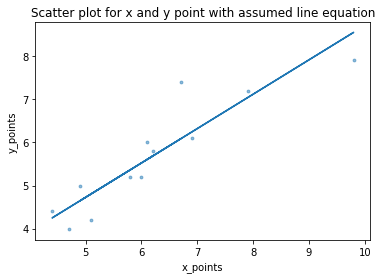

In [93]:
plt.plot(x, y_prdict)

plt.scatter(x, y,s=8 ,alpha=0.5)
plt.title('Scatter plot for x and y point with assumed line equation')
plt.xlabel('x_points')
plt.ylabel('y_points')
plt.show()

#### Use R2 score to evaluate LR equation output
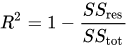
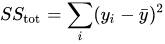
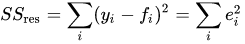
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [94]:
r2_score(y, y_prdict)

0.8191913440602496

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [106]:
x = reg[:,0]
x_vector = np.array([[1 for x in x],x])
print (x_vector)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.        ]
 [6.69999981 4.9000001  7.9000001  9.80000019 6.9000001  6.0999999
  6.19999981 6.         5.0999999  4.69999981 4.4000001  5.80000019]]


In [108]:
#intial needed values and vectoris x and setas
x = reg[:,0]
x_vectors = np.array([[1 for x in x],x])
y = np.array(reg[:,1])
seta_vectors = np.array([0,0])
alfa = .001
loss_norm = 10
j_list = []
y_prdict = np.array([])

#itirate until reach to value near to zero for normalization of loss_function values
while abs(loss_norm) > .00002: 
    y_prdict = np.matmul(x_vectors.transpose() , seta_vectors.transpose())
    seta_vectors = seta_vectors - (alfa*(1/y.size))*((y_prdict - y)*x_vectors).sum(axis = 1)
    loss = alfa*(1/(2*y.size))*sum((y_prdict - y)**2)
    j_list.append(loss)
    loss_diff_vectors = alfa*(1/y.size)*sum((y_prdict - y))
    loss_norm = np.linalg.norm(loss_diff_vectors)
    print("end iter",seta_vectors)

end iter [0.0057    0.0369975]
end iter [0.01116461 0.07245594]
end iter [0.01640361 0.10643934]
end iter [0.0214264  0.13900904]
end iter [0.02624196 0.17022384]
end iter [0.03085891 0.2001401 ]
end iter [0.03528551 0.22881182]
end iter [0.03952969 0.25629077]
end iter [0.04359902 0.28262656]
end iter [0.04750078 0.30786673]
end iter [0.05124194 0.33205686]
end iter [0.05482918 0.35524061]
end iter [0.0582689  0.37745985]
end iter [0.06156723 0.39875468]
end iter [0.06473006 0.41916356]
end iter [0.06776302 0.43872334]
end iter [0.07067152 0.45746933]
end iter [0.07346073 0.47543538]
end iter [0.07613561 0.49265393]
end iter [0.07870091 0.50915607]
end iter [0.0811612  0.52497159]
end iter [0.08352084 0.54012906]
end iter [0.08578402 0.55465584]
end iter [0.08795474 0.56857816]
end iter [0.09003687 0.58192117]
end iter [0.09203407 0.59470896]
end iter [0.09394988 0.60696462]
end iter [0.09578769 0.61871029]
end iter [0.09755075 0.62996718]
end iter [0.09924215 0.64075561]
end iter [0.

end iter [0.15130981 0.88735163]
end iter [0.15134953 0.88734556]
end iter [0.15138924 0.88733949]
end iter [0.15142895 0.88733342]
end iter [0.15146866 0.88732735]
end iter [0.15150837 0.88732128]
end iter [0.15154807 0.88731521]
end iter [0.15158778 0.88730914]
end iter [0.15162748 0.88730307]
end iter [0.15166718 0.887297  ]
end iter [0.15170687 0.88729093]
end iter [0.15174657 0.88728486]
end iter [0.15178626 0.88727879]
end iter [0.15182595 0.88727272]
end iter [0.15186564 0.88726666]
end iter [0.15190533 0.88726059]
end iter [0.15194501 0.88725452]
end iter [0.1519847  0.88724845]
end iter [0.15202438 0.88724239]
end iter [0.15206406 0.88723632]
end iter [0.15210373 0.88723025]
end iter [0.15214341 0.88722419]
end iter [0.15218308 0.88721812]
end iter [0.15222275 0.88721205]
end iter [0.15226242 0.88720599]
end iter [0.15230209 0.88719992]
end iter [0.15234176 0.88719386]
end iter [0.15238142 0.88718779]
end iter [0.15242108 0.88718173]
end iter [0.15246074 0.88717566]
end iter [

end iter [0.16781496 0.88482734]
end iter [0.16785384 0.8848214 ]
end iter [0.16789272 0.88481545]
end iter [0.1679316 0.8848095]
end iter [0.16797047 0.88480356]
end iter [0.16800935 0.88479761]
end iter [0.16804822 0.88479167]
end iter [0.16808709 0.88478572]
end iter [0.16812596 0.88477978]
end iter [0.16816482 0.88477383]
end iter [0.16820369 0.88476789]
end iter [0.16824255 0.88476195]
end iter [0.16828141 0.884756  ]
end iter [0.16832027 0.88475006]
end iter [0.16835912 0.88474412]
end iter [0.16839798 0.88473817]
end iter [0.16843683 0.88473223]
end iter [0.16847568 0.88472629]
end iter [0.16851453 0.88472035]
end iter [0.16855338 0.88471441]
end iter [0.16859222 0.88470847]
end iter [0.16863106 0.88470252]
end iter [0.16866991 0.88469658]
end iter [0.16870874 0.88469064]
end iter [0.16874758 0.8846847 ]
end iter [0.16878642 0.88467876]
end iter [0.16882525 0.88467282]
end iter [0.16886408 0.88466689]
end iter [0.16890291 0.88466095]
end iter [0.16894174 0.88465501]
end iter [0.

end iter [0.18241153 0.88259488]
end iter [0.18244967 0.88258904]
end iter [0.18248782 0.88258321]
end iter [0.18252596 0.88257738]
end iter [0.1825641  0.88257154]
end iter [0.18260223 0.88256571]
end iter [0.18264037 0.88255988]
end iter [0.1826785  0.88255404]
end iter [0.18271664 0.88254821]
end iter [0.18275477 0.88254238]
end iter [0.18279289 0.88253655]
end iter [0.18283102 0.88253072]
end iter [0.18286914 0.88252489]
end iter [0.18290727 0.88251906]
end iter [0.18294539 0.88251323]
end iter [0.1829835 0.8825074]
end iter [0.18302162 0.88250157]
end iter [0.18305974 0.88249574]
end iter [0.18309785 0.88248991]
end iter [0.18313596 0.88248408]
end iter [0.18317407 0.88247825]
end iter [0.18321217 0.88247242]
end iter [0.18325028 0.88246659]
end iter [0.18328838 0.88246077]
end iter [0.18332648 0.88245494]
end iter [0.18336458 0.88244911]
end iter [0.18340268 0.88244329]
end iter [0.18344077 0.88243746]
end iter [0.18347887 0.88243163]
end iter [0.18351696 0.88242581]
end iter [0.

end iter [0.19688123 0.88038181]
end iter [0.19691864 0.88037609]
end iter [0.19695605 0.88037037]
end iter [0.19699347 0.88036465]
end iter [0.19703088 0.88035893]
end iter [0.19706828 0.8803532 ]
end iter [0.19710569 0.88034748]
end iter [0.19714309 0.88034176]
end iter [0.19718049 0.88033604]
end iter [0.19721789 0.88033032]
end iter [0.19725529 0.8803246 ]
end iter [0.19729269 0.88031888]
end iter [0.19733008 0.88031316]
end iter [0.19736747 0.88030744]
end iter [0.19740486 0.88030173]
end iter [0.19744225 0.88029601]
end iter [0.19747964 0.88029029]
end iter [0.19751702 0.88028457]
end iter [0.19755441 0.88027885]
end iter [0.19759179 0.88027314]
end iter [0.19762917 0.88026742]
end iter [0.19766654 0.8802617 ]
end iter [0.19770392 0.88025599]
end iter [0.19774129 0.88025027]
end iter [0.19777867 0.88024456]
end iter [0.19781603 0.88023884]
end iter [0.1978534  0.88023312]
end iter [0.19789077 0.88022741]
end iter [0.19792813 0.8802217 ]
end iter [0.19796549 0.88021598]
end iter [

end iter [0.21081697 0.87825042]
end iter [0.21085368 0.8782448 ]
end iter [0.21089039 0.87823919]
end iter [0.2109271  0.87823357]
end iter [0.2109638  0.87822796]
end iter [0.21100051 0.87822235]
end iter [0.21103721 0.87821673]
end iter [0.21107391 0.87821112]
end iter [0.21111061 0.87820551]
end iter [0.21114731 0.87819989]
end iter [0.211184   0.87819428]
end iter [0.2112207  0.87818867]
end iter [0.21125739 0.87818306]
end iter [0.21129408 0.87817745]
end iter [0.21133076 0.87817183]
end iter [0.21136745 0.87816622]
end iter [0.21140413 0.87816061]
end iter [0.21144082 0.878155  ]
end iter [0.2114775  0.87814939]
end iter [0.21151417 0.87814378]
end iter [0.21155085 0.87813817]
end iter [0.21158752 0.87813256]
end iter [0.2116242  0.87812696]
end iter [0.21166087 0.87812135]
end iter [0.21169754 0.87811574]
end iter [0.2117342  0.87811013]
end iter [0.21177087 0.87810452]
end iter [0.21180753 0.87809892]
end iter [0.2118442  0.87809331]
end iter [0.21188086 0.8780877 ]
end iter [

end iter [0.22416647 0.87620868]
end iter [0.22420251 0.87620317]
end iter [0.22423855 0.87619766]
end iter [0.22427458 0.87619215]
end iter [0.22431062 0.87618664]
end iter [0.22434665 0.87618113]
end iter [0.22438267 0.87617561]
end iter [0.2244187 0.8761701]
end iter [0.22445473 0.87616459]
end iter [0.22449075 0.87615909]
end iter [0.22452677 0.87615358]
end iter [0.22456279 0.87614807]
end iter [0.22459881 0.87614256]
end iter [0.22463483 0.87613705]
end iter [0.22467084 0.87613154]
end iter [0.22470685 0.87612603]
end iter [0.22474286 0.87612053]
end iter [0.22477887 0.87611502]
end iter [0.22481488 0.87610951]
end iter [0.22485088 0.876104  ]
end iter [0.22488689 0.8760985 ]
end iter [0.22492289 0.87609299]
end iter [0.22495889 0.87608749]
end iter [0.22499489 0.87608198]
end iter [0.22503088 0.87607647]
end iter [0.22506688 0.87607097]
end iter [0.22510287 0.87606546]
end iter [0.22513886 0.87605996]
end iter [0.22517485 0.87605446]
end iter [0.22521084 0.87604895]
end iter [0.

end iter [0.23903763 0.87393422]
end iter [0.23907292 0.87392882]
end iter [0.23910821 0.87392342]
end iter [0.23914349 0.87391803]
end iter [0.23917877 0.87391263]
end iter [0.23921405 0.87390724]
end iter [0.23924933 0.87390184]
end iter [0.23928461 0.87389644]
end iter [0.23931988 0.87389105]
end iter [0.23935515 0.87388565]
end iter [0.23939043 0.87388026]
end iter [0.2394257  0.87387487]
end iter [0.23946096 0.87386947]
end iter [0.23949623 0.87386408]
end iter [0.23953149 0.87385868]
end iter [0.23956676 0.87385329]
end iter [0.23960202 0.8738479 ]
end iter [0.23963728 0.87384251]
end iter [0.23967253 0.87383711]
end iter [0.23970779 0.87383172]
end iter [0.23974304 0.87382633]
end iter [0.23977829 0.87382094]
end iter [0.23981354 0.87381555]
end iter [0.23984879 0.87381016]
end iter [0.23988404 0.87380476]
end iter [0.23991928 0.87379937]
end iter [0.23995453 0.87379398]
end iter [0.23998977 0.87378859]
end iter [0.24002501 0.8737832 ]
end iter [0.24006024 0.87377781]
end iter [

end iter [0.25287308 0.87181816]
end iter [0.25290767 0.87181287]
end iter [0.25294225 0.87180758]
end iter [0.25297684 0.87180229]
end iter [0.25301142 0.871797  ]
end iter [0.253046   0.87179171]
end iter [0.25308059 0.87178642]
end iter [0.25311516 0.87178113]
end iter [0.25314974 0.87177585]
end iter [0.25318432 0.87177056]
end iter [0.25321889 0.87176527]
end iter [0.25325346 0.87175998]
end iter [0.25328803 0.8717547 ]
end iter [0.2533226  0.87174941]
end iter [0.25335717 0.87174412]
end iter [0.25339173 0.87173884]
end iter [0.25342629 0.87173355]
end iter [0.25346085 0.87172826]
end iter [0.25349541 0.87172298]
end iter [0.25352997 0.87171769]
end iter [0.25356453 0.87171241]
end iter [0.25359908 0.87170712]
end iter [0.25363363 0.87170184]
end iter [0.25366819 0.87169655]
end iter [0.25370273 0.87169127]
end iter [0.25373728 0.87168599]
end iter [0.25377183 0.8716807 ]
end iter [0.25380637 0.87167542]
end iter [0.25384091 0.87167014]
end iter [0.25387545 0.87166485]
end iter [

end iter [0.267485   0.86958335]
end iter [0.26751885 0.86957817]
end iter [0.2675527  0.86957299]
end iter [0.26758655 0.86956781]
end iter [0.2676204  0.86956264]
end iter [0.26765424 0.86955746]
end iter [0.26768808 0.86955228]
end iter [0.26772193 0.86954711]
end iter [0.26775577 0.86954193]
end iter [0.2677896  0.86953676]
end iter [0.26782344 0.86953158]
end iter [0.26785727 0.86952641]
end iter [0.26789111 0.86952123]
end iter [0.26792494 0.86951606]
end iter [0.26795877 0.86951089]
end iter [0.2679926  0.86950571]
end iter [0.26802642 0.86950054]
end iter [0.26806025 0.86949536]
end iter [0.26809407 0.86949019]
end iter [0.26812789 0.86948502]
end iter [0.26816171 0.86947985]
end iter [0.26819553 0.86947467]
end iter [0.26822934 0.8694695 ]
end iter [0.26826316 0.86946433]
end iter [0.26829697 0.86945916]
end iter [0.26833078 0.86945399]
end iter [0.26836459 0.86944882]
end iter [0.2683984  0.86944365]
end iter [0.2684322  0.86943848]
end iter [0.26846601 0.86943331]
end iter [

end iter [0.27892995 0.8678329 ]
end iter [0.27896323 0.86782781]
end iter [0.2789965  0.86782272]
end iter [0.27902977 0.86781764]
end iter [0.27906304 0.86781255]
end iter [0.27909631 0.86780746]
end iter [0.27912957 0.86780237]
end iter [0.27916284 0.86779728]
end iter [0.2791961 0.8677922]
end iter [0.27922936 0.86778711]
end iter [0.27926262 0.86778202]
end iter [0.27929587 0.86777694]
end iter [0.27932913 0.86777185]
end iter [0.27936238 0.86776676]
end iter [0.27939564 0.86776168]
end iter [0.27942889 0.86775659]
end iter [0.27946214 0.86775151]
end iter [0.27949538 0.86774642]
end iter [0.27952863 0.86774134]
end iter [0.27956187 0.86773625]
end iter [0.27959511 0.86773117]
end iter [0.27962836 0.86772608]
end iter [0.27966159 0.867721  ]
end iter [0.27969483 0.86771592]
end iter [0.27972807 0.86771083]
end iter [0.2797613  0.86770575]
end iter [0.27979453 0.86770067]
end iter [0.27982776 0.86769559]
end iter [0.27986099 0.8676905 ]
end iter [0.27989422 0.86768542]
end iter [0.

end iter [0.29161714 0.86589246]
end iter [0.29164977 0.86588747]
end iter [0.2916824  0.86588248]
end iter [0.29171503 0.86587749]
end iter [0.29174766 0.8658725 ]
end iter [0.29178029 0.86586751]
end iter [0.29181291 0.86586252]
end iter [0.29184554 0.86585753]
end iter [0.29187816 0.86585254]
end iter [0.29191078 0.86584755]
end iter [0.2919434  0.86584256]
end iter [0.29197602 0.86583758]
end iter [0.29200863 0.86583259]
end iter [0.29204125 0.8658276 ]
end iter [0.29207386 0.86582261]
end iter [0.29210647 0.86581762]
end iter [0.29213908 0.86581264]
end iter [0.29217169 0.86580765]
end iter [0.29220429 0.86580266]
end iter [0.2922369  0.86579768]
end iter [0.2922695  0.86579269]
end iter [0.2923021 0.8657877]
end iter [0.2923347  0.86578272]
end iter [0.2923673  0.86577773]
end iter [0.29239989 0.86577275]
end iter [0.29243249 0.86576776]
end iter [0.29246508 0.86576278]
end iter [0.29249767 0.86575779]
end iter [0.29253026 0.86575281]
end iter [0.29256285 0.86574782]
end iter [0.

end iter [0.30406018 0.86398937]
end iter [0.30409218 0.86398447]
end iter [0.30412419 0.86397958]
end iter [0.30415619 0.86397468]
end iter [0.30418819 0.86396979]
end iter [0.30422019 0.8639649 ]
end iter [0.30425219 0.86396   ]
end iter [0.30428418 0.86395511]
end iter [0.30431618 0.86395021]
end iter [0.30434817 0.86394532]
end iter [0.30438016 0.86394043]
end iter [0.30441215 0.86393554]
end iter [0.30444414 0.86393064]
end iter [0.30447613 0.86392575]
end iter [0.30450811 0.86392086]
end iter [0.30454009 0.86391597]
end iter [0.30457208 0.86391108]
end iter [0.30460406 0.86390619]
end iter [0.30463603 0.86390129]
end iter [0.30466801 0.8638964 ]
end iter [0.30469999 0.86389151]
end iter [0.30473196 0.86388662]
end iter [0.30476393 0.86388173]
end iter [0.3047959  0.86387684]
end iter [0.30482787 0.86387195]
end iter [0.30485984 0.86386706]
end iter [0.3048918  0.86386218]
end iter [0.30492377 0.86385729]
end iter [0.30495573 0.8638524 ]
end iter [0.30498769 0.86384751]
end iter [

end iter [0.3143145  0.86242102]
end iter [0.31434599 0.86241621]
end iter [0.31437748 0.86241139]
end iter [0.31440896 0.86240658]
end iter [0.31444044 0.86240176]
end iter [0.31447193 0.86239695]
end iter [0.31450341 0.86239213]
end iter [0.31453489 0.86238732]
end iter [0.31456636 0.8623825 ]
end iter [0.31459784 0.86237769]
end iter [0.31462931 0.86237288]
end iter [0.31466078 0.86236806]
end iter [0.31469226 0.86236325]
end iter [0.31472372 0.86235844]
end iter [0.31475519 0.86235362]
end iter [0.31478666 0.86234881]
end iter [0.31481812 0.862344  ]
end iter [0.31484959 0.86233919]
end iter [0.31488105 0.86233437]
end iter [0.31491251 0.86232956]
end iter [0.31494396 0.86232475]
end iter [0.31497542 0.86231994]
end iter [0.31500688 0.86231513]
end iter [0.31503833 0.86231032]
end iter [0.31506978 0.86230551]
end iter [0.31510123 0.8623007 ]
end iter [0.31513268 0.86229589]
end iter [0.31516413 0.86229108]
end iter [0.31519557 0.86228627]
end iter [0.31522702 0.86228146]
end iter [

end iter [0.32548636 0.86071235]
end iter [0.32551728 0.86070762]
end iter [0.3255482  0.86070289]
end iter [0.32557912 0.86069816]
end iter [0.32561004 0.86069343]
end iter [0.32564096 0.8606887 ]
end iter [0.32567188 0.86068397]
end iter [0.32570279 0.86067925]
end iter [0.32573371 0.86067452]
end iter [0.32576462 0.86066979]
end iter [0.32579553 0.86066506]
end iter [0.32582644 0.86066034]
end iter [0.32585735 0.86065561]
end iter [0.32588825 0.86065088]
end iter [0.32591916 0.86064616]
end iter [0.32595006 0.86064143]
end iter [0.32598096 0.8606367 ]
end iter [0.32601186 0.86063198]
end iter [0.32604276 0.86062725]
end iter [0.32607365 0.86062253]
end iter [0.32610455 0.8606178 ]
end iter [0.32613544 0.86061308]
end iter [0.32616633 0.86060835]
end iter [0.32619722 0.86060363]
end iter [0.32622811 0.8605989 ]
end iter [0.326259   0.86059418]
end iter [0.32628988 0.86058945]
end iter [0.32632077 0.86058473]
end iter [0.32635165 0.86058001]
end iter [0.32638253 0.86057528]
end iter [

end iter [0.33706529 0.85894141]
end iter [0.33709563 0.85893677]
end iter [0.33712597 0.85893213]
end iter [0.3371563  0.85892749]
end iter [0.33718664 0.85892285]
end iter [0.33721697 0.85891821]
end iter [0.33724731 0.85891358]
end iter [0.33727764 0.85890894]
end iter [0.33730797 0.8589043 ]
end iter [0.33733829 0.85889966]
end iter [0.33736862 0.85889502]
end iter [0.33739895 0.85889038]
end iter [0.33742927 0.85888575]
end iter [0.33745959 0.85888111]
end iter [0.33748991 0.85887647]
end iter [0.33752023 0.85887183]
end iter [0.33755055 0.8588672 ]
end iter [0.33758086 0.85886256]
end iter [0.33761118 0.85885792]
end iter [0.33764149 0.85885329]
end iter [0.3376718  0.85884865]
end iter [0.33770211 0.85884402]
end iter [0.33773242 0.85883938]
end iter [0.33776272 0.85883474]
end iter [0.33779303 0.85883011]
end iter [0.33782333 0.85882548]
end iter [0.33785363 0.85882084]
end iter [0.33788393 0.85881621]
end iter [0.33791423 0.85881157]
end iter [0.33794453 0.85880694]
end iter [

end iter [0.3489015  0.85713113]
end iter [0.34893125 0.85712658]
end iter [0.34896099 0.85712203]
end iter [0.34899073 0.85711748]
end iter [0.34902047 0.85711293]
end iter [0.3490502  0.85710839]
end iter [0.34907994 0.85710384]
end iter [0.34910967 0.85709929]
end iter [0.3491394  0.85709474]
end iter [0.34916914 0.8570902 ]
end iter [0.34919886 0.85708565]
end iter [0.34922859 0.8570811 ]
end iter [0.34925832 0.85707656]
end iter [0.34928804 0.85707201]
end iter [0.34931777 0.85706746]
end iter [0.34934749 0.85706292]
end iter [0.34937721 0.85705837]
end iter [0.34940693 0.85705383]
end iter [0.34943664 0.85704928]
end iter [0.34946636 0.85704474]
end iter [0.34949607 0.85704019]
end iter [0.34952579 0.85703565]
end iter [0.3495555 0.8570311]
end iter [0.34958521 0.85702656]
end iter [0.34961492 0.85702202]
end iter [0.34964462 0.85701747]
end iter [0.34967433 0.85701293]
end iter [0.34970403 0.85700839]
end iter [0.34973373 0.85700384]
end iter [0.34976343 0.8569993 ]
end iter [0.

end iter [0.36140787 0.85521835]
end iter [0.36143698 0.85521389]
end iter [0.36146609 0.85520944]
end iter [0.3614952  0.85520499]
end iter [0.3615243  0.85520054]
end iter [0.36155341 0.85519609]
end iter [0.36158251 0.85519164]
end iter [0.36161162 0.85518718]
end iter [0.36164072 0.85518273]
end iter [0.36166982 0.85517828]
end iter [0.36169892 0.85517383]
end iter [0.36172801 0.85516938]
end iter [0.36175711 0.85516493]
end iter [0.3617862  0.85516048]
end iter [0.36181529 0.85515603]
end iter [0.36184439 0.85515158]
end iter [0.36187347 0.85514713]
end iter [0.36190256 0.85514269]
end iter [0.36193165 0.85513824]
end iter [0.36196073 0.85513379]
end iter [0.36198982 0.85512934]
end iter [0.3620189  0.85512489]
end iter [0.36204798 0.85512045]
end iter [0.36207706 0.855116  ]
end iter [0.36210614 0.85511155]
end iter [0.36213521 0.8551071 ]
end iter [0.36216429 0.85510266]
end iter [0.36219336 0.85509821]
end iter [0.36222243 0.85509376]
end iter [0.3622515  0.85508932]
end iter [

end iter [0.37173647 0.85363864]
end iter [0.37176506 0.85363427]
end iter [0.37179365 0.8536299 ]
end iter [0.37182223 0.85362553]
end iter [0.37185082 0.85362115]
end iter [0.3718794  0.85361678]
end iter [0.37190799 0.85361241]
end iter [0.37193657 0.85360804]
end iter [0.37196515 0.85360367]
end iter [0.37199373 0.8535993 ]
end iter [0.3720223  0.85359493]
end iter [0.37205088 0.85359056]
end iter [0.37207945 0.85358619]
end iter [0.37210803 0.85358182]
end iter [0.3721366  0.85357745]
end iter [0.37216517 0.85357308]
end iter [0.37219374 0.85356871]
end iter [0.3722223  0.85356434]
end iter [0.37225087 0.85355997]
end iter [0.37227943 0.8535556 ]
end iter [0.372308   0.85355123]
end iter [0.37233656 0.85354686]
end iter [0.37236512 0.85354249]
end iter [0.37239368 0.85353813]
end iter [0.37242223 0.85353376]
end iter [0.37245079 0.85352939]
end iter [0.37247934 0.85352502]
end iter [0.3725079  0.85352066]
end iter [0.37253645 0.85351629]
end iter [0.372565   0.85351192]
end iter [

end iter [0.38314224 0.85189419]
end iter [0.38317026 0.85188991]
end iter [0.38319827 0.85188562]
end iter [0.38322628 0.85188134]
end iter [0.38325429 0.85187705]
end iter [0.3832823  0.85187277]
end iter [0.38331031 0.85186849]
end iter [0.38333832 0.8518642 ]
end iter [0.38336632 0.85185992]
end iter [0.38339433 0.85185564]
end iter [0.38342233 0.85185135]
end iter [0.38345033 0.85184707]
end iter [0.38347833 0.85184279]
end iter [0.38350632 0.85183851]
end iter [0.38353432 0.85183422]
end iter [0.38356232 0.85182994]
end iter [0.38359031 0.85182566]
end iter [0.3836183  0.85182138]
end iter [0.38364629 0.8518171 ]
end iter [0.38367428 0.85181282]
end iter [0.38370227 0.85180854]
end iter [0.38373025 0.85180426]
end iter [0.38375824 0.85179998]
end iter [0.38378622 0.8517957 ]
end iter [0.38381421 0.85179142]
end iter [0.38384219 0.85178714]
end iter [0.38387017 0.85178286]
end iter [0.38389814 0.85177858]
end iter [0.38392612 0.8517743 ]
end iter [0.38395409 0.85177002]
end iter [

end iter [0.39379655 0.85026467]
end iter [0.39382403 0.85026047]
end iter [0.39385151 0.85025627]
end iter [0.39387898 0.85025206]
end iter [0.39390645 0.85024786]
end iter [0.39393393 0.85024366]
end iter [0.3939614  0.85023946]
end iter [0.39398886 0.85023526]
end iter [0.39401633 0.85023106]
end iter [0.3940438  0.85022686]
end iter [0.39407126 0.85022266]
end iter [0.39409872 0.85021846]
end iter [0.39412619 0.85021426]
end iter [0.39415365 0.85021006]
end iter [0.39418111 0.85020586]
end iter [0.39420856 0.85020166]
end iter [0.39423602 0.85019746]
end iter [0.39426347 0.85019326]
end iter [0.39429093 0.85018906]
end iter [0.39431838 0.85018486]
end iter [0.39434583 0.85018066]
end iter [0.39437328 0.85017646]
end iter [0.39440073 0.85017227]
end iter [0.39442817 0.85016807]
end iter [0.39445562 0.85016387]
end iter [0.39448306 0.85015967]
end iter [0.3945105  0.85015548]
end iter [0.39453794 0.85015128]
end iter [0.39456538 0.85014708]
end iter [0.39459282 0.85014289]
end iter [

end iter [0.40432721 0.84865406]
end iter [0.40435416 0.84864994]
end iter [0.4043811  0.84864582]
end iter [0.40440804 0.8486417 ]
end iter [0.40443499 0.84863758]
end iter [0.40446193 0.84863346]
end iter [0.40448886 0.84862934]
end iter [0.4045158  0.84862522]
end iter [0.40454274 0.8486211 ]
end iter [0.40456967 0.84861698]
end iter [0.40459661 0.84861286]
end iter [0.40462354 0.84860874]
end iter [0.40465047 0.84860462]
end iter [0.4046774 0.8486005]
end iter [0.40470432 0.84859639]
end iter [0.40473125 0.84859227]
end iter [0.40475818 0.84858815]
end iter [0.4047851  0.84858403]
end iter [0.40481202 0.84857991]
end iter [0.40483894 0.8485758 ]
end iter [0.40486586 0.84857168]
end iter [0.40489278 0.84856756]
end iter [0.4049197  0.84856345]
end iter [0.40494661 0.84855933]
end iter [0.40497353 0.84855521]
end iter [0.40500044 0.8485511 ]
end iter [0.40502735 0.84854698]
end iter [0.40505426 0.84854287]
end iter [0.40508117 0.84853875]
end iter [0.40510808 0.84853463]
end iter [0.

end iter [0.41491836 0.8470342 ]
end iter [0.41494477 0.84703016]
end iter [0.41497118 0.84702613]
end iter [0.41499759 0.84702209]
end iter [0.415024   0.84701805]
end iter [0.4150504  0.84701401]
end iter [0.41507681 0.84700997]
end iter [0.41510321 0.84700593]
end iter [0.41512961 0.84700189]
end iter [0.41515601 0.84699786]
end iter [0.41518241 0.84699382]
end iter [0.41520881 0.84698978]
end iter [0.41523521 0.84698574]
end iter [0.4152616  0.84698171]
end iter [0.415288   0.84697767]
end iter [0.41531439 0.84697363]
end iter [0.41534078 0.8469696 ]
end iter [0.41536717 0.84696556]
end iter [0.41539356 0.84696153]
end iter [0.41541994 0.84695749]
end iter [0.41544633 0.84695345]
end iter [0.41547271 0.84694942]
end iter [0.4154991  0.84694538]
end iter [0.41552548 0.84694135]
end iter [0.41555186 0.84693731]
end iter [0.41557824 0.84693328]
end iter [0.41560461 0.84692925]
end iter [0.41563099 0.84692521]
end iter [0.41565737 0.84692118]
end iter [0.41568374 0.84691714]
end iter [

end iter [0.4242888  0.84560105]
end iter [0.42431474 0.84559708]
end iter [0.42434068 0.84559311]
end iter [0.42436661 0.84558914]
end iter [0.42439255 0.84558518]
end iter [0.42441848 0.84558121]
end iter [0.42444441 0.84557725]
end iter [0.42447034 0.84557328]
end iter [0.42449627 0.84556931]
end iter [0.4245222  0.84556535]
end iter [0.42454812 0.84556138]
end iter [0.42457405 0.84555742]
end iter [0.42459997 0.84555345]
end iter [0.4246259  0.84554949]
end iter [0.42465182 0.84554552]
end iter [0.42467774 0.84554156]
end iter [0.42470365 0.8455376 ]
end iter [0.42472957 0.84553363]
end iter [0.42475549 0.84552967]
end iter [0.4247814  0.84552571]
end iter [0.42480732 0.84552174]
end iter [0.42483323 0.84551778]
end iter [0.42485914 0.84551382]
end iter [0.42488505 0.84550985]
end iter [0.42491095 0.84550589]
end iter [0.42493686 0.84550193]
end iter [0.42496277 0.84549797]
end iter [0.42498867 0.845494  ]
end iter [0.42501457 0.84549004]
end iter [0.42504047 0.84548608]
end iter [

end iter [0.43326214 0.84422862]
end iter [0.43328762 0.84422472]
end iter [0.43331311 0.84422083]
end iter [0.43333859 0.84421693]
end iter [0.43336407 0.84421303]
end iter [0.43338955 0.84420914]
end iter [0.43341503 0.84420524]
end iter [0.43344051 0.84420134]
end iter [0.43346598 0.84419745]
end iter [0.43349146 0.84419355]
end iter [0.43351693 0.84418965]
end iter [0.4335424  0.84418576]
end iter [0.43356787 0.84418186]
end iter [0.43359334 0.84417797]
end iter [0.43361881 0.84417407]
end iter [0.43364428 0.84417018]
end iter [0.43366974 0.84416628]
end iter [0.43369521 0.84416239]
end iter [0.43372067 0.84415849]
end iter [0.43374613 0.8441546 ]
end iter [0.43377159 0.8441507 ]
end iter [0.43379705 0.84414681]
end iter [0.43382251 0.84414292]
end iter [0.43384797 0.84413902]
end iter [0.43387342 0.84413513]
end iter [0.43389888 0.84413124]
end iter [0.43392433 0.84412734]
end iter [0.43394978 0.84412345]
end iter [0.43397523 0.84411956]
end iter [0.43400068 0.84411567]
end iter [

end iter [0.44175316 0.84292997]
end iter [0.44177822 0.84292613]
end iter [0.44180327 0.8429223 ]
end iter [0.44182833 0.84291847]
end iter [0.44185338 0.84291464]
end iter [0.44187843 0.84291081]
end iter [0.44190348 0.84290698]
end iter [0.44192853 0.84290314]
end iter [0.44195358 0.84289931]
end iter [0.44197862 0.84289548]
end iter [0.44200367 0.84289165]
end iter [0.44202871 0.84288782]
end iter [0.44205376 0.84288399]
end iter [0.4420788  0.84288016]
end iter [0.44210384 0.84287633]
end iter [0.44212888 0.8428725 ]
end iter [0.44215391 0.84286867]
end iter [0.44217895 0.84286484]
end iter [0.44220398 0.84286101]
end iter [0.44222902 0.84285719]
end iter [0.44225405 0.84285336]
end iter [0.44227908 0.84284953]
end iter [0.44230411 0.8428457 ]
end iter [0.44232914 0.84284187]
end iter [0.44235417 0.84283804]
end iter [0.4423792  0.84283422]
end iter [0.44240422 0.84283039]
end iter [0.44242924 0.84282656]
end iter [0.44245427 0.84282274]
end iter [0.44247929 0.84281891]
end iter [

end iter [0.45142993 0.84144996]
end iter [0.4514545 0.8414462]
end iter [0.45147907 0.84144244]
end iter [0.45150363 0.84143868]
end iter [0.4515282  0.84143493]
end iter [0.45155276 0.84143117]
end iter [0.45157732 0.84142741]
end iter [0.45160189 0.84142366]
end iter [0.45162644 0.8414199 ]
end iter [0.451651   0.84141614]
end iter [0.45167556 0.84141239]
end iter [0.45170012 0.84140863]
end iter [0.45172467 0.84140488]
end iter [0.45174922 0.84140112]
end iter [0.45177378 0.84139737]
end iter [0.45179833 0.84139361]
end iter [0.45182288 0.84138986]
end iter [0.45184742 0.8413861 ]
end iter [0.45187197 0.84138235]
end iter [0.45189652 0.84137859]
end iter [0.45192106 0.84137484]
end iter [0.45194561 0.84137109]
end iter [0.45197015 0.84136733]
end iter [0.45199469 0.84136358]
end iter [0.45201923 0.84135983]
end iter [0.45204377 0.84135607]
end iter [0.4520683  0.84135232]
end iter [0.45209284 0.84134857]
end iter [0.45211738 0.84134481]
end iter [0.45214191 0.84134106]
end iter [0.

end iter [0.46062893 0.84004302]
end iter [0.46065304 0.84003933]
end iter [0.46067714 0.84003564]
end iter [0.46070124 0.84003196]
end iter [0.46072534 0.84002827]
end iter [0.46074944 0.84002459]
end iter [0.46077354 0.8400209 ]
end iter [0.46079763 0.84001722]
end iter [0.46082173 0.84001353]
end iter [0.46084582 0.84000985]
end iter [0.46086992 0.84000616]
end iter [0.46089401 0.84000248]
end iter [0.4609181  0.83999879]
end iter [0.46094219 0.83999511]
end iter [0.46096628 0.83999142]
end iter [0.46099036 0.83998774]
end iter [0.46101445 0.83998405]
end iter [0.46103853 0.83998037]
end iter [0.46106262 0.83997669]
end iter [0.4610867 0.839973 ]
end iter [0.46111078 0.83996932]
end iter [0.46113486 0.83996564]
end iter [0.46115894 0.83996196]
end iter [0.46118302 0.83995827]
end iter [0.46120709 0.83995459]
end iter [0.46123117 0.83995091]
end iter [0.46125524 0.83994723]
end iter [0.46127931 0.83994355]
end iter [0.46130338 0.83993986]
end iter [0.46132745 0.83993618]
end iter [0.

end iter [0.47064631 0.83851091]
end iter [0.47066991 0.8385073 ]
end iter [0.4706935 0.8385037]
end iter [0.4707171  0.83850009]
end iter [0.47074069 0.83849648]
end iter [0.47076429 0.83849287]
end iter [0.47078788 0.83848926]
end iter [0.47081147 0.83848565]
end iter [0.47083506 0.83848205]
end iter [0.47085865 0.83847844]
end iter [0.47088224 0.83847483]
end iter [0.47090582 0.83847122]
end iter [0.47092941 0.83846761]
end iter [0.47095299 0.83846401]
end iter [0.47097658 0.8384604 ]
end iter [0.47100016 0.83845679]
end iter [0.47102374 0.83845319]
end iter [0.47104732 0.83844958]
end iter [0.4710709  0.83844598]
end iter [0.47109447 0.83844237]
end iter [0.47111805 0.83843876]
end iter [0.47114162 0.83843516]
end iter [0.4711652  0.83843155]
end iter [0.47118877 0.83842795]
end iter [0.47121234 0.83842434]
end iter [0.47123591 0.83842074]
end iter [0.47125948 0.83841713]
end iter [0.47128305 0.83841353]
end iter [0.47130661 0.83840992]
end iter [0.47133018 0.83840632]
end iter [0.

end iter [0.47962107 0.83713827]
end iter [0.47964422 0.83713473]
end iter [0.47966736 0.83713119]
end iter [0.47969051 0.83712765]
end iter [0.47971365 0.83712411]
end iter [0.47973679 0.83712057]
end iter [0.47975993 0.83711703]
end iter [0.47978307 0.8371135 ]
end iter [0.47980621 0.83710996]
end iter [0.47982934 0.83710642]
end iter [0.47985248 0.83710288]
end iter [0.47987561 0.83709934]
end iter [0.47989874 0.8370958 ]
end iter [0.47992187 0.83709227]
end iter [0.479945   0.83708873]
end iter [0.47996813 0.83708519]
end iter [0.47999126 0.83708165]
end iter [0.48001439 0.83707812]
end iter [0.48003751 0.83707458]
end iter [0.48006064 0.83707104]
end iter [0.48008376 0.83706751]
end iter [0.48010688 0.83706397]
end iter [0.48013    0.83706043]
end iter [0.48015312 0.8370569 ]
end iter [0.48017624 0.83705336]
end iter [0.48019936 0.83704983]
end iter [0.48022248 0.83704629]
end iter [0.48024559 0.83704275]
end iter [0.48026871 0.83703922]
end iter [0.48029182 0.83703568]
end iter [

end iter [0.48749184 0.83593448]
end iter [0.48751459 0.835931  ]
end iter [0.48753734 0.83592752]
end iter [0.48756009 0.83592404]
end iter [0.48758283 0.83592056]
end iter [0.48760557 0.83591709]
end iter [0.48762832 0.83591361]
end iter [0.48765106 0.83591013]
end iter [0.4876738  0.83590665]
end iter [0.48769654 0.83590317]
end iter [0.48771927 0.8358997 ]
end iter [0.48774201 0.83589622]
end iter [0.48776475 0.83589274]
end iter [0.48778748 0.83588926]
end iter [0.48781021 0.83588579]
end iter [0.48783295 0.83588231]
end iter [0.48785568 0.83587883]
end iter [0.48787841 0.83587536]
end iter [0.48790114 0.83587188]
end iter [0.48792386 0.8358684 ]
end iter [0.48794659 0.83586493]
end iter [0.48796932 0.83586145]
end iter [0.48799204 0.83585798]
end iter [0.48801476 0.8358545 ]
end iter [0.48803748 0.83585103]
end iter [0.48806021 0.83584755]
end iter [0.48808293 0.83584408]
end iter [0.48810564 0.8358406 ]
end iter [0.48812836 0.83583713]
end iter [0.48815108 0.83583365]
end iter [

end iter [0.4958308  0.83465908]
end iter [0.49585313 0.83465567]
end iter [0.49587545 0.83465225]
end iter [0.49589778 0.83464884]
end iter [0.4959201  0.83464542]
end iter [0.49594242 0.83464201]
end iter [0.49596475 0.83463859]
end iter [0.49598707 0.83463518]
end iter [0.49600939 0.83463177]
end iter [0.4960317  0.83462835]
end iter [0.49605402 0.83462494]
end iter [0.49607634 0.83462153]
end iter [0.49609865 0.83461811]
end iter [0.49612097 0.8346147 ]
end iter [0.49614328 0.83461129]
end iter [0.49616559 0.83460788]
end iter [0.4961879  0.83460446]
end iter [0.49621021 0.83460105]
end iter [0.49623252 0.83459764]
end iter [0.49625483 0.83459423]
end iter [0.49627713 0.83459082]
end iter [0.49629944 0.83458741]
end iter [0.49632174 0.83458399]
end iter [0.49634404 0.83458058]
end iter [0.49636634 0.83457717]
end iter [0.49638865 0.83457376]
end iter [0.49641094 0.83457035]
end iter [0.49643324 0.83456694]
end iter [0.49645554 0.83456353]
end iter [0.49647784 0.83456012]
end iter [

end iter [0.50298426 0.833565  ]
end iter [0.50300622 0.83356164]
end iter [0.50302819 0.83355828]
end iter [0.50305015 0.83355492]
end iter [0.50307212 0.83355156]
end iter [0.50309408 0.8335482 ]
end iter [0.50311604 0.83354484]
end iter [0.503138   0.83354148]
end iter [0.50315996 0.83353813]
end iter [0.50318191 0.83353477]
end iter [0.50320387 0.83353141]
end iter [0.50322583 0.83352805]
end iter [0.50324778 0.83352469]
end iter [0.50326973 0.83352134]
end iter [0.50329168 0.83351798]
end iter [0.50331364 0.83351462]
end iter [0.50333559 0.83351126]
end iter [0.50335753 0.83350791]
end iter [0.50337948 0.83350455]
end iter [0.50340143 0.83350119]
end iter [0.50342337 0.83349784]
end iter [0.50344532 0.83349448]
end iter [0.50346726 0.83349113]
end iter [0.5034892  0.83348777]
end iter [0.50351114 0.83348441]
end iter [0.50353308 0.83348106]
end iter [0.50355502 0.8334777 ]
end iter [0.50357696 0.83347435]
end iter [0.5035989  0.83347099]
end iter [0.50362083 0.83346764]
end iter [

end iter [0.51148912 0.83226422]
end iter [0.51151066 0.83226093]
end iter [0.5115322  0.83225764]
end iter [0.51155373 0.83225434]
end iter [0.51157526 0.83225105]
end iter [0.5115968  0.83224776]
end iter [0.51161833 0.83224446]
end iter [0.51163986 0.83224117]
end iter [0.51166139 0.83223788]
end iter [0.51168292 0.83223458]
end iter [0.51170445 0.83223129]
end iter [0.51172597 0.832228  ]
end iter [0.5117475  0.83222471]
end iter [0.51176902 0.83222142]
end iter [0.51179054 0.83221812]
end iter [0.51181207 0.83221483]
end iter [0.51183359 0.83221154]
end iter [0.51185511 0.83220825]
end iter [0.51187662 0.83220496]
end iter [0.51189814 0.83220167]
end iter [0.51191966 0.83219838]
end iter [0.51194117 0.83219509]
end iter [0.51196269 0.8321918 ]
end iter [0.5119842 0.8321885]
end iter [0.51200571 0.83218521]
end iter [0.51202722 0.83218192]
end iter [0.51204873 0.83217863]
end iter [0.51207024 0.83217535]
end iter [0.51209175 0.83217206]
end iter [0.51211326 0.83216877]
end iter [0.

end iter [0.52043974 0.83089528]
end iter [0.52046083 0.83089205]
end iter [0.52048191 0.83088883]
end iter [0.52050299 0.8308856 ]
end iter [0.52052408 0.83088238]
end iter [0.52054516 0.83087915]
end iter [0.52056624 0.83087593]
end iter [0.52058732 0.8308727 ]
end iter [0.52060839 0.83086948]
end iter [0.52062947 0.83086626]
end iter [0.52065055 0.83086303]
end iter [0.52067162 0.83085981]
end iter [0.5206927  0.83085659]
end iter [0.52071377 0.83085336]
end iter [0.52073484 0.83085014]
end iter [0.52075591 0.83084692]
end iter [0.52077698 0.8308437 ]
end iter [0.52079805 0.83084047]
end iter [0.52081911 0.83083725]
end iter [0.52084018 0.83083403]
end iter [0.52086125 0.83083081]
end iter [0.52088231 0.83082759]
end iter [0.52090337 0.83082437]
end iter [0.52092444 0.83082114]
end iter [0.5209455  0.83081792]
end iter [0.52096656 0.8308147 ]
end iter [0.52098762 0.83081148]
end iter [0.52100867 0.83080826]
end iter [0.52102973 0.83080504]
end iter [0.52105079 0.83080182]
end iter [

end iter [0.52808635 0.82972577]
end iter [0.52810705 0.8297226 ]
end iter [0.52812774 0.82971944]
end iter [0.52814844 0.82971627]
end iter [0.52816914 0.82971311]
end iter [0.52818983 0.82970994]
end iter [0.52821053 0.82970678]
end iter [0.52823122 0.82970361]
end iter [0.52825191 0.82970045]
end iter [0.5282726  0.82969728]
end iter [0.52829329 0.82969412]
end iter [0.52831398 0.82969095]
end iter [0.52833467 0.82968779]
end iter [0.52835536 0.82968462]
end iter [0.52837604 0.82968146]
end iter [0.52839673 0.8296783 ]
end iter [0.52841741 0.82967513]
end iter [0.5284381  0.82967197]
end iter [0.52845878 0.82966881]
end iter [0.52847946 0.82966564]
end iter [0.52850014 0.82966248]
end iter [0.52852082 0.82965932]
end iter [0.52854149 0.82965616]
end iter [0.52856217 0.82965299]
end iter [0.52858285 0.82964983]
end iter [0.52860352 0.82964667]
end iter [0.52862419 0.82964351]
end iter [0.52864487 0.82964035]
end iter [0.52866554 0.82963718]
end iter [0.52868621 0.82963402]
end iter [

end iter [0.53624275 0.82847829]
end iter [0.53626304 0.82847519]
end iter [0.53628333 0.82847208]
end iter [0.53630361 0.82846898]
end iter [0.5363239  0.82846588]
end iter [0.53634418 0.82846278]
end iter [0.53636446 0.82845967]
end iter [0.53638475 0.82845657]
end iter [0.53640503 0.82845347]
end iter [0.53642531 0.82845037]
end iter [0.53644559 0.82844727]
end iter [0.53646586 0.82844417]
end iter [0.53648614 0.82844106]
end iter [0.53650642 0.82843796]
end iter [0.53652669 0.82843486]
end iter [0.53654696 0.82843176]
end iter [0.53656724 0.82842866]
end iter [0.53658751 0.82842556]
end iter [0.53660778 0.82842246]
end iter [0.53662805 0.82841936]
end iter [0.53664832 0.82841626]
end iter [0.53666858 0.82841316]
end iter [0.53668885 0.82841006]
end iter [0.53670911 0.82840696]
end iter [0.53672938 0.82840386]
end iter [0.53674964 0.82840076]
end iter [0.5367699  0.82839766]
end iter [0.53679017 0.82839457]
end iter [0.53681043 0.82839147]
end iter [0.53683068 0.82838837]
end iter [

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [109]:
r2_score(y, y_prdict)

0.8151187705526955

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [110]:
#already done in last while loop above

### Plot loss vs. iterations

(-7.037957044531217e-05, 0.001784041868906921)

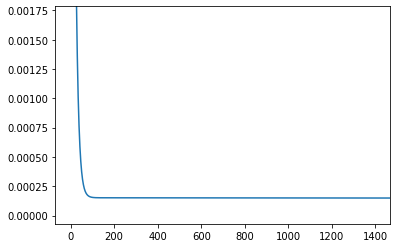

In [111]:
plt.plot(j_list)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * .1, xmax * .1)
plt.ylim(ymin * .1, ymax * .1)

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [12]:
import csv
import pandas as pd
df=pd.read_csv('MultipleLR_seta0.csv', sep=',',header=None)
np_val = np.array(df.values)
print(np_val)

[[  1  73  80  75 152]
 [  1  93  88  93 185]
 [  1  89  91  90 180]
 [  1  96  98 100 196]
 [  1  73  66  70 142]
 [  1  53  46  55 101]
 [  1  69  74  77 149]
 [  1  47  56  60 115]
 [  1  87  79  90 175]
 [  1  79  70  88 164]
 [  1  69  70  73 141]
 [  1  70  65  74 141]
 [  1  93  95  91 184]
 [  1  79  80  73 152]
 [  1  70  73  78 148]
 [  1  93  89  96 192]
 [  1  78  75  68 147]
 [  1  81  90  93 183]
 [  1  88  92  86 177]
 [  1  78  83  77 159]
 [  1  82  86  90 177]
 [  1  86  82  89 175]
 [  1  78  83  85 175]
 [  1  76  83  71 149]
 [  1  96  93  95 192]]


In [13]:
x_vectors = np_val[:,0:4]
print(x_vectors)
y = np_val[:,4]
print(y)

[[  1  73  80  75]
 [  1  93  88  93]
 [  1  89  91  90]
 [  1  96  98 100]
 [  1  73  66  70]
 [  1  53  46  55]
 [  1  69  74  77]
 [  1  47  56  60]
 [  1  87  79  90]
 [  1  79  70  88]
 [  1  69  70  73]
 [  1  70  65  74]
 [  1  93  95  91]
 [  1  79  80  73]
 [  1  70  73  78]
 [  1  93  89  96]
 [  1  78  75  68]
 [  1  81  90  93]
 [  1  88  92  86]
 [  1  78  83  77]
 [  1  82  86  90]
 [  1  86  82  89]
 [  1  78  83  85]
 [  1  76  83  71]
 [  1  96  93  95]]
[152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]


In [14]:
#intiate setas values
setas = np.array([0 for x in range(x_vectors.shape[1])])
print(setas)

[0 0 0 0]


In [15]:
#get intial values of y_prdict using setas and x_vectors
y_prdict = np.matmul(x_vectors , setas.transpose())
print(y_prdict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
#declare proper value for alfa 
alfa = .0001

#delcare intial value for loss_function _value 
loss_norm = 10

# declare the intial vlaues of loss_function
loss = alfa*(1/(2*y.size))*sum((y_prdict - y)**2)
print("intial loss function value ",loss)

# declare the intial vlaues of loss_function
loss_diff_vectors = alfa*(1/y.size)*sum((y_prdict - y))
loss_norm = np.linalg.norm(loss_diff_vectors)
print("intial loss_diff_vectors and loss norm values ",loss_diff_vectors,loss_norm)

#finally declaring the list of loss function values in every iteration
j_list = []

intial loss function value  1.3405980000000002
intial loss_diff_vectors and loss norm values  -0.016204000000000003 0.016204000000000003


### Repeat your implementation but for more than one variable

In [17]:
while abs(loss_norm) > .00002: 
    y_prdict = np.matmul(x_vectors , setas.transpose())
    setas = setas - (alfa*(1/y.size))*((y_prdict - y)*x_vectors.transpose()).sum(axis = 1)
    loss = alfa*(1/(2*y.size))*sum((y_prdict - y)**2)
    j_list.append(loss)
    loss_diff_vectors = alfa*(1/y.size)*sum((y_prdict - y))
    loss_norm = np.linalg.norm(loss_diff_vectors)
    print("end iter",setas)

end iter [0.016204 1.30758  1.31472  1.346708]
end iter [0.0006489  0.05184957 0.05202407 0.0558825 ]
end iter [0.01557419 1.25622728 1.26297518 1.29639541]
end iter [0.00124626 0.09954618 0.099875   0.10748265]
end iter [0.01499375 1.20886459 1.21524503 1.25017927]
end iter [0.00179615 0.14341767 0.14388242 0.15513783]
end iter [0.01445876 1.16517728 1.17121313 1.20773585]
end iter [0.00230232 0.18376601 0.18434995 0.1991588 ]
end iter [0.01396564 1.12487552 1.13058805 1.16876697]
end iter [0.0027682  0.22086936 0.22155726 0.23983179]
end iter [0.01351109 1.08769234 1.09310133 1.13299796]
end iter [0.00319698 0.25498391 0.25576194 0.27742046]
end iter [0.01309205 1.05338184 1.05850571 1.10017584]
end iter [0.00359158 0.28634566 0.28720126 0.31216766]
end iter [0.01270572 1.02171752 1.02657341 1.0700676 ]
end iter [0.00395468 0.31517197 0.31609377 0.3442971 ]
end iter [0.01234952 0.99249076 0.99709466 1.04245859]
end iter [0.00428878 0.34166306 0.34264077 0.37401481]
end iter [0.012021

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [19]:
y_test=np.matmul(x_vectors , setas.transpose())
print(y_test)

[153.71638054 185.27323541 182.25567422 198.8435746  141.13864548
 104.66150558 149.22070639 111.13814766 173.70332241 161.71894381
 143.5586099  141.91682401 187.9423016  155.76417761 150.02341581
 188.29756013 148.07712405 179.18228772 179.03976391 160.20571734
 174.93402447 174.12286065 166.64091972 154.16044966 191.76595397]


### Plot loss vs. iterations

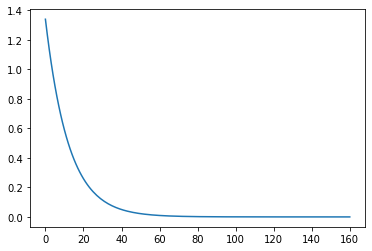

In [76]:
plt.plot(j_list)

#### Use R2 score to evaluate LR equation output

In [20]:
r2_score(y, y_prdict)

0.9833925624393876

## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
import pandas as pd
df=pd.read_csv('RegData.csv', sep=',',header=None)
np_val = np.array(df.values)
print(np_val)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


In [52]:
x = np.array([np_val[:,0]]).transpose()
print(x)

[[2.9000001 ]
 [6.69999981]
 [4.9000001 ]
 [7.9000001 ]
 [9.80000019]
 [6.9000001 ]
 [6.0999999 ]
 [6.19999981]
 [6.        ]
 [5.0999999 ]
 [4.69999981]
 [4.4000001 ]
 [5.80000019]]


In [53]:
y = np_val[:,1]
print(y)

[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Train the model (fit the model to the training data)

In [54]:
reg = LinearRegression().fit(x, y)

#### Predict y values using the trained model

In [57]:
y_prdict = reg.predict(x)
print(y_prdict)

[3.44824549 6.08745623 4.83730388 6.92089146 8.240497   6.22636227
 5.67073878 5.74019163 5.60128593 4.97620959 4.69839784 4.49003928
 5.46238022]


#### Plot model output (fitted line) with the original data (scatter plot of X,y)

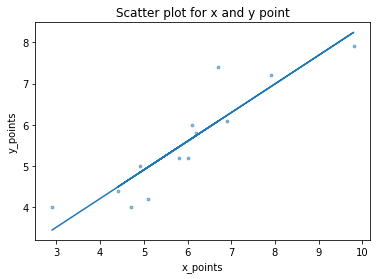

In [58]:
plt.plot(x, y_prdict)
plt.scatter(x, y,s=8 ,alpha=0.5)
plt.title('Scatter plot for x and y point')
plt.xlabel('x_points')
plt.ylabel('y_points')
plt.show()

#### Use R2 score to evaluate model output

In [59]:
r2_score(y, y_prdict)

0.8213156778363775

### Repeat for Mulivariate

In [60]:
import csv
import pandas as pd
df=pd.read_csv('MultipleLR.csv', sep=',',header=None)
np_val = np.array(df.values)
print(np_val)

[[ 73  80  75 152]
 [ 93  88  93 185]
 [ 89  91  90 180]
 [ 96  98 100 196]
 [ 73  66  70 142]
 [ 53  46  55 101]
 [ 69  74  77 149]
 [ 47  56  60 115]
 [ 87  79  90 175]
 [ 79  70  88 164]
 [ 69  70  73 141]
 [ 70  65  74 141]
 [ 93  95  91 184]
 [ 79  80  73 152]
 [ 70  73  78 148]
 [ 93  89  96 192]
 [ 78  75  68 147]
 [ 81  90  93 183]
 [ 88  92  86 177]
 [ 78  83  77 159]
 [ 82  86  90 177]
 [ 86  82  89 175]
 [ 78  83  85 175]
 [ 76  83  71 149]
 [ 96  93  95 192]]


In [62]:
x_vectors = np_val[:,0:3]
print(x_vectors)
y = np_val[:,3]
print(y)

[[ 73  80  75]
 [ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]
 [ 53  46  55]
 [ 69  74  77]
 [ 47  56  60]
 [ 87  79  90]
 [ 79  70  88]
 [ 69  70  73]
 [ 70  65  74]
 [ 93  95  91]
 [ 79  80  73]
 [ 70  73  78]
 [ 93  89  96]
 [ 78  75  68]
 [ 81  90  93]
 [ 88  92  86]
 [ 78  83  77]
 [ 82  86  90]
 [ 86  82  89]
 [ 78  83  85]
 [ 76  83  71]
 [ 96  93  95]]
[152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]


In [63]:
reg = LinearRegression().fit(x_vectors, y)

In [64]:
y_prdict = reg.predict(x_vectors)
print(y_prdict)

[152.60720439 185.08011472 181.78158547 199.74522647 139.1747207
 103.69391793 150.2632274  112.82069728 174.55948394 164.49442094
 143.42337551 142.23416416 186.54285759 152.40794527 151.24409108
 189.12496613 143.50219218 181.89389361 177.29838914 158.34934019
 176.57742415 174.66365778 167.68889392 150.63279846 191.1954116 ]


In [65]:
r2_score(y, y_prdict)

0.98966157894484